## 0. Introduction

The satellite and the ground station communicate using binary data of 0s and 1s. However, it is difficult to make instantaneous decisions. Therefore, ground station software converts binary data into decimal data for easy handling and reading, which is called a Graphical User Interface.

To create ground station software, a class function is created. The class is like box (definition,function,etc.).
And,The class function argument is an action that allows the class to inherit from other classes and be used within them. 
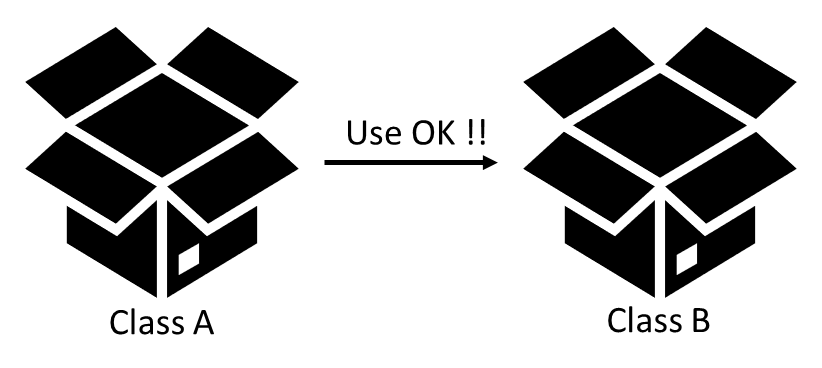

## 1.Window creation
After class setup and customtkinter inheritance are complete, the next step is to create the background of the software and the frame.
First, determine the size of the background.  The background size can be set by specifying the height and width using the function of geometry. And like this picture, you can make the background frame. Also,Let's also provide the function needed to close the window.
This is performed by associating the function protocol with the function delete_window.
Let's run the following program to create a Window.

In [1]:
from tkinter import *
import customtkinter
from tkinter import messagebox

class hepta_sat_gs(customtkinter.CTk):
    WIDTH = 1000                                                                # Screen Size for x
    HEIGHT = 500                                                                # Screen Size for y
    
    def __init__(self):
        super().__init__()
        self.title("User Interface")                                            # Set the Title
        self.geometry(f"{hepta_sat_gs.WIDTH}x{hepta_sat_gs.HEIGHT}")            # Perform size adjustment
        self.protocol("WM_DELETE_WINDOW", self.delete_window)                   # call .delete_window() when app gets closed
    
    def delete_window(self,event=0):
        ret = messagebox.askyesno(title = "End Confirmation",message = "Do you want to exit the program ?")
        if ret == True:
            self.destroy()
           
# =============================================================================
# Main Sequence
# =============================================================================    
if __name__ == "__main__":
    app = hepta_sat_gs()
    app.mainloop()

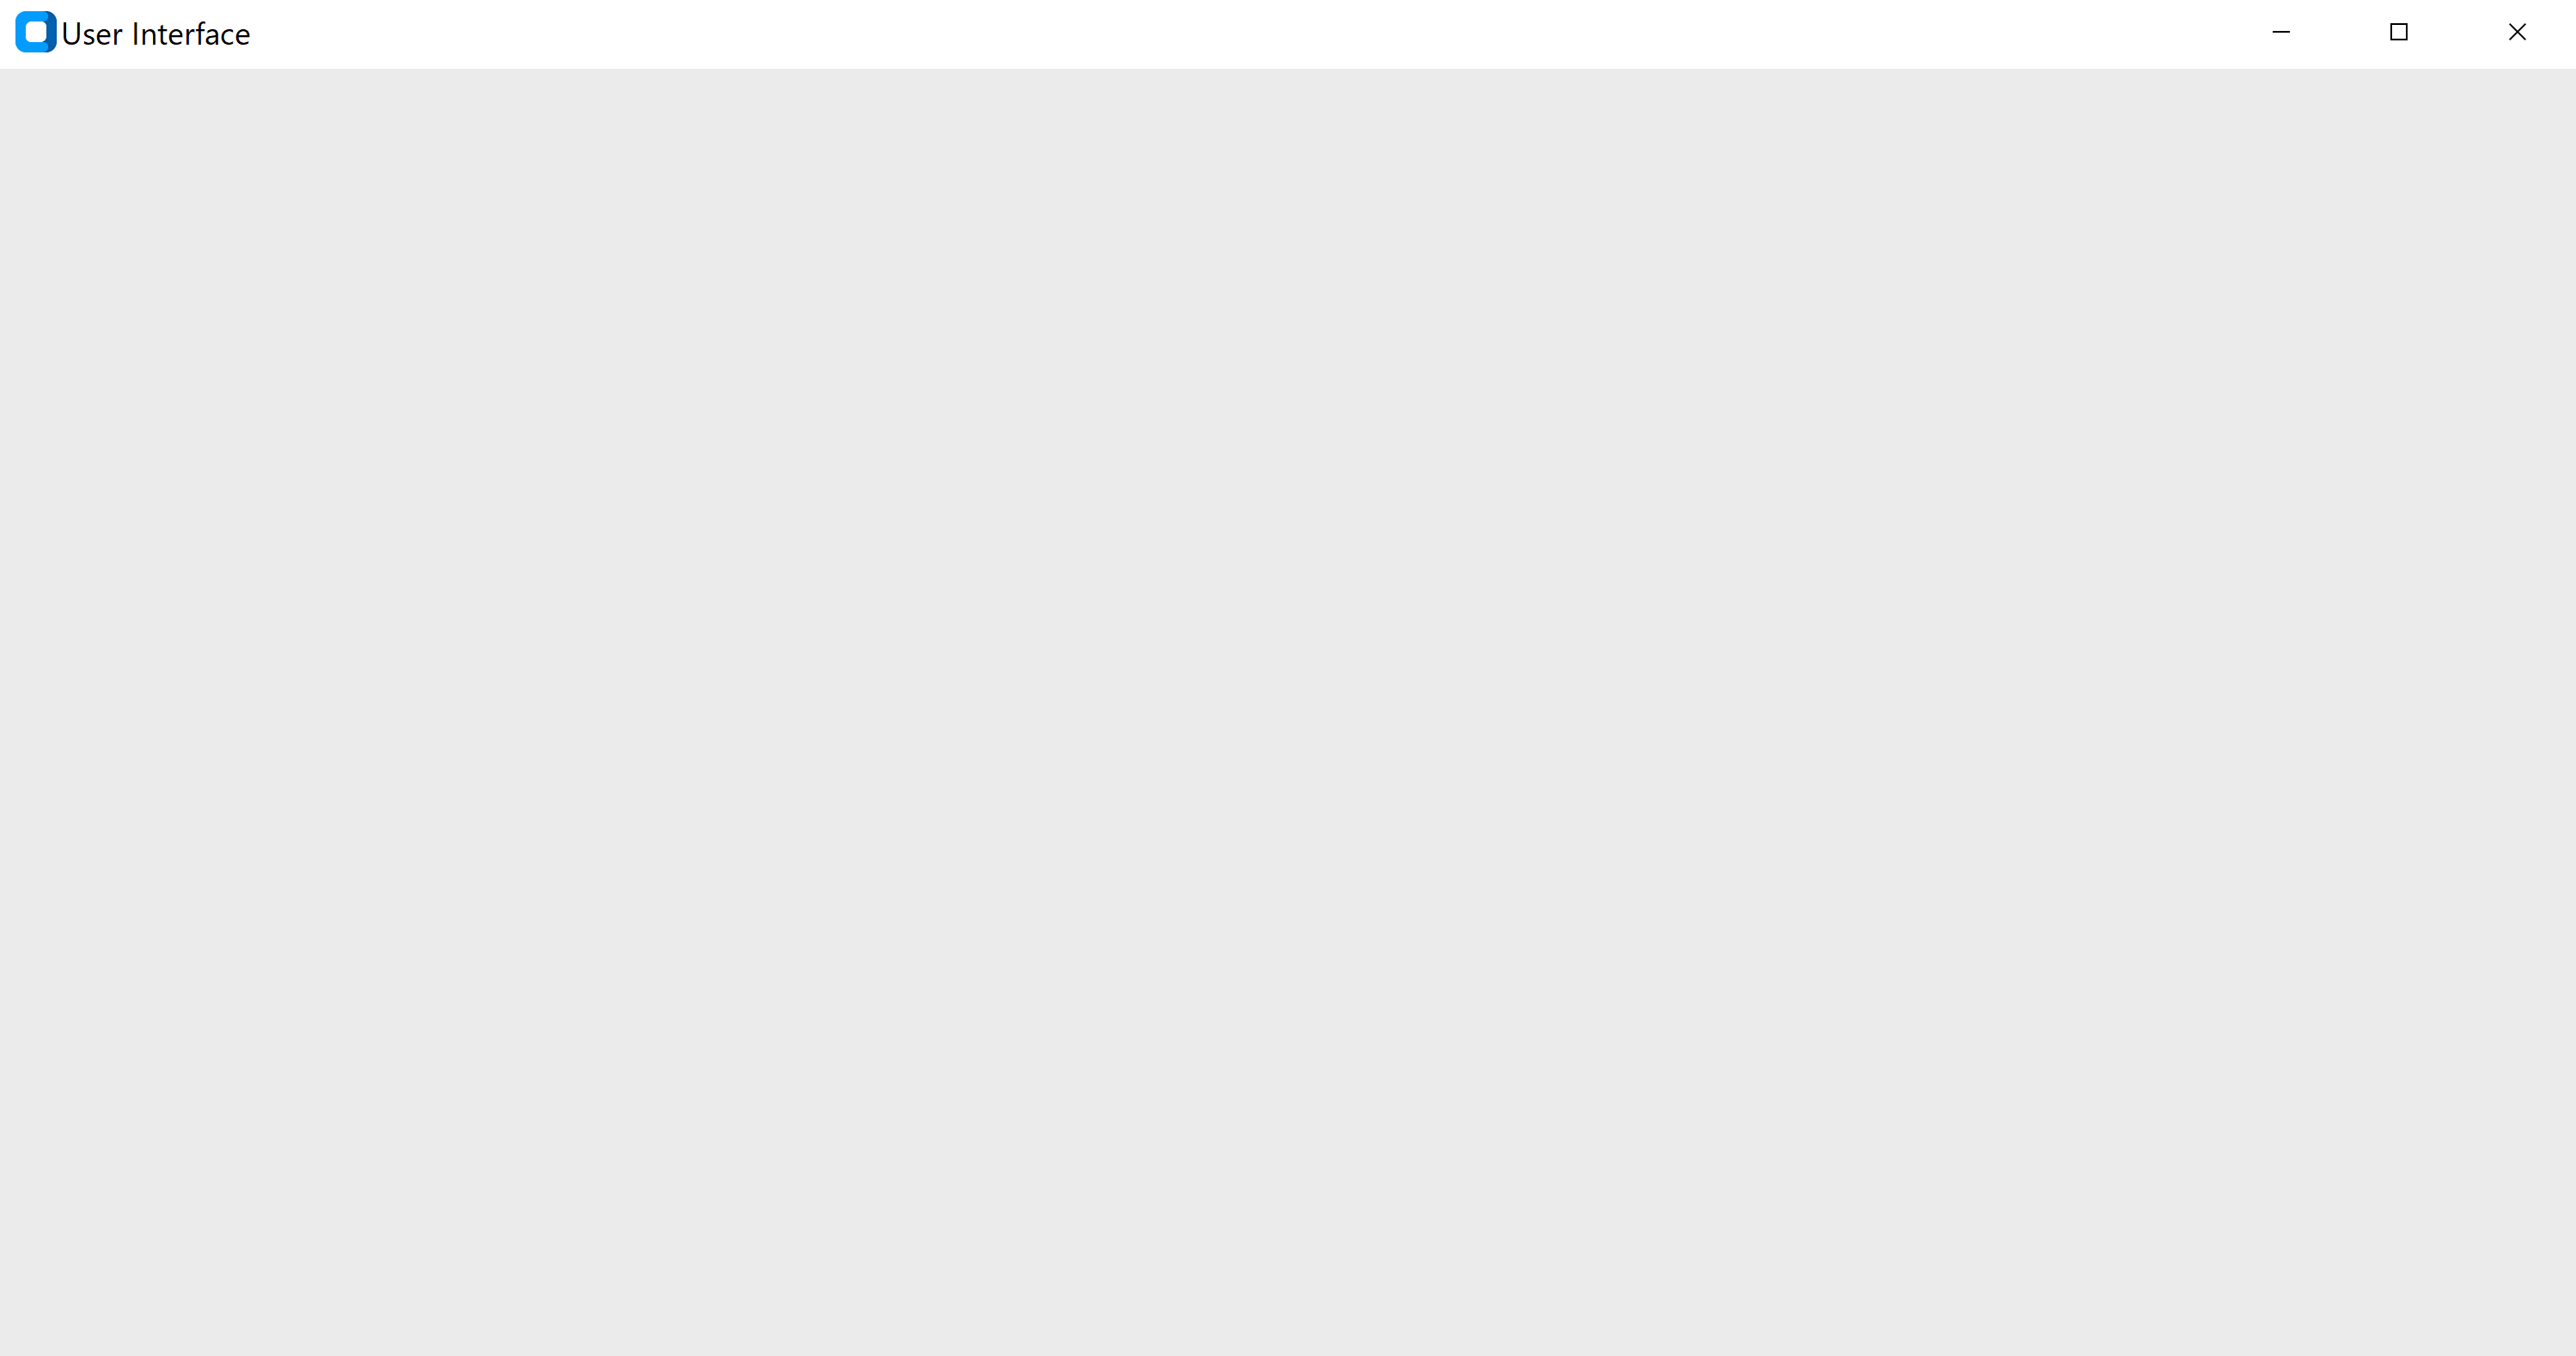

## Appendix (What is the “self.” ?)

If you receive an error message that a variable is not specified or the number of arguments is not correct, please refer to the following.
What is the “self”? A "self" is a process required when a class is used to link definitions, variables, or functions of B to definitions, variables, or functions of A. It is not always necessary to use "self", but it is a common expression when creating a class.
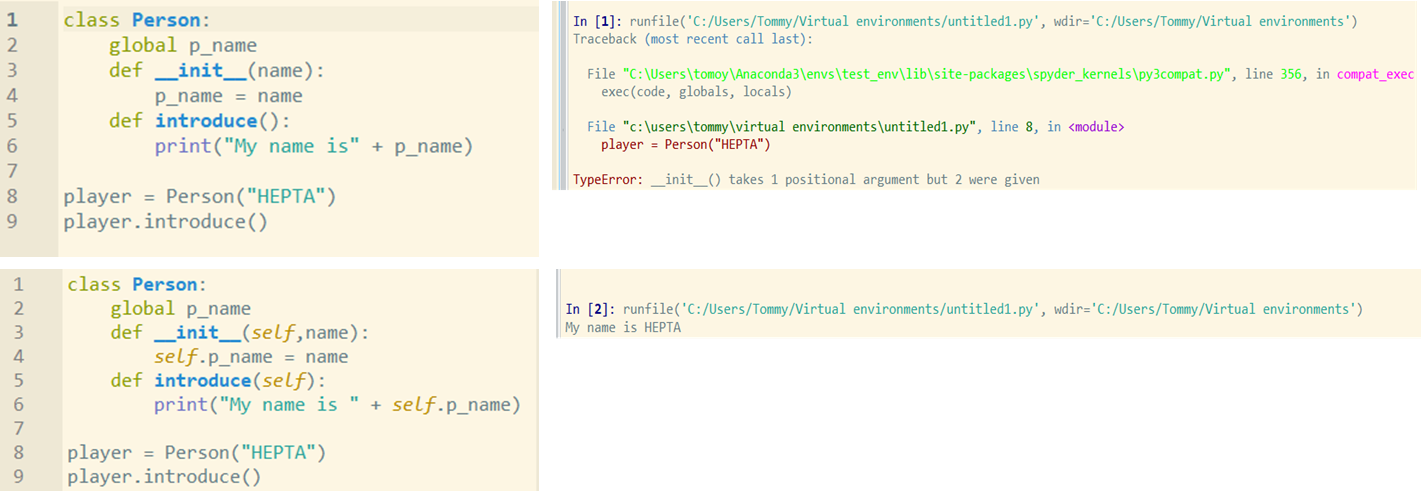

## 2.Frame and Button creation

The next step is to create a frame. The frame creation method is defined in the init_ function at the beginning.

self.menu_window()

For frame creation, use the function name defined in init_. To create a Frame, use the function customtkinter.CTkFrame.
For placement, use the gird function. After creating the background frame and the menu frame, prepare widgets and frames with detailed functions. The placement of the frames can be easily determined by specifying a matrix.
Let's run the following program to create a Frame and Button.
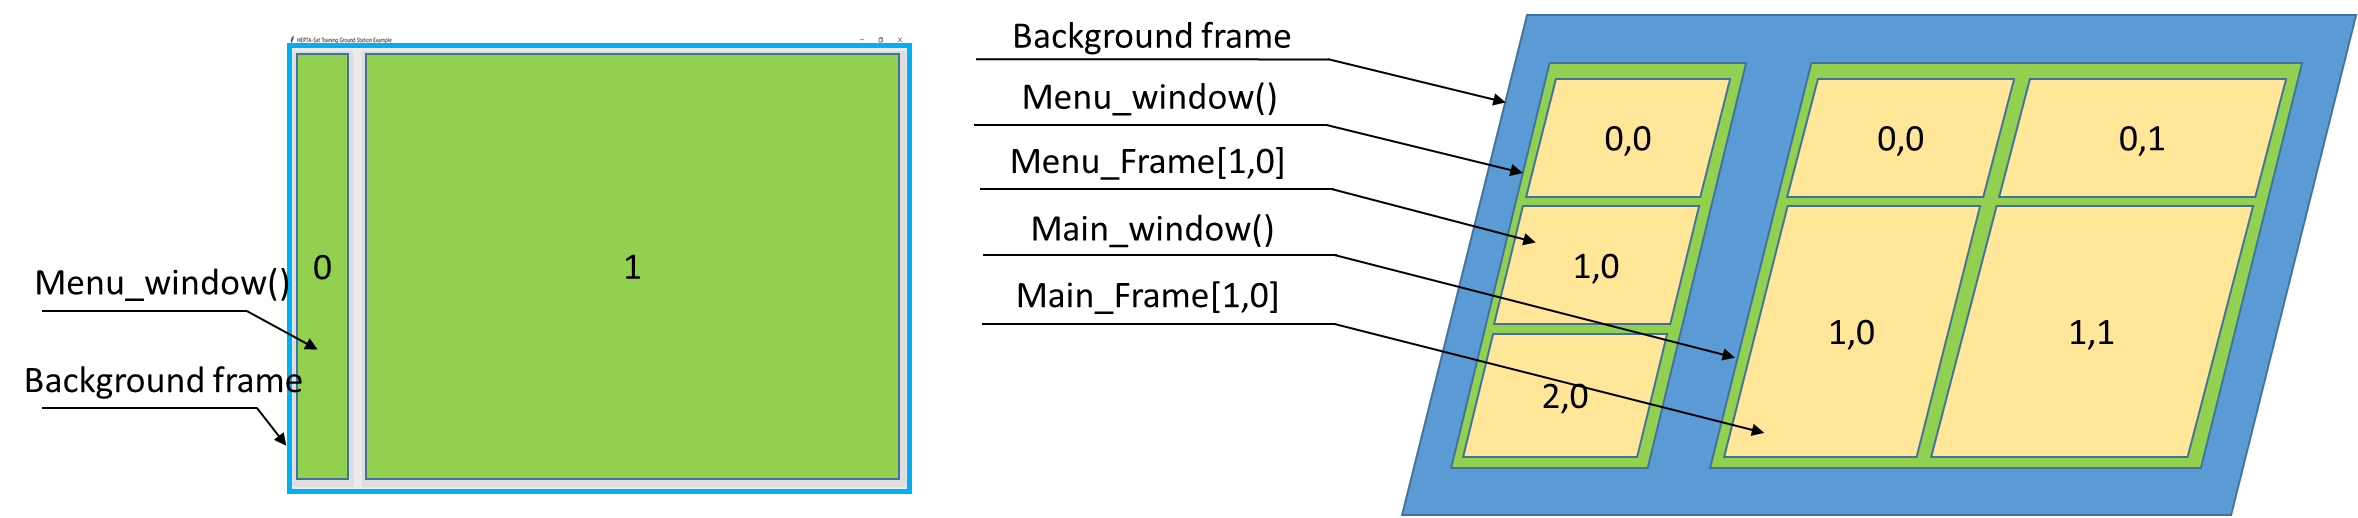

After the frame size is determined, adjust it to fit the screen. This adjustment is defined by specifying how much of the total area the specified rows and columns will occupy ,and the maximum or minimum size, using the function of row/column_configure.
if you set "weight =1", which row or column only one , the size is adjusted for the full size of the frame.
After you understand how placement works, let's actually place the widget.
This time, the menu widgets are
text x 3
The text can be created using the CTkLabel(text=“”) function.
Button widget x 1
Toggle menu x 1
Adjust the placement of the above five widgets.

*It is also possible to create a blank space by specifying a value greater than or equal to the matrix to be used (set weight =1 for the specified row/column to determine the maximum and minimum widgets to be used).
Next, let's adjust the position of the widget . The grid function is used to move the image to the right, left, or center it.
The grid function takes the following three arguments as main arguments.
Specify the matrix number for placement
How far away from the frame edge
Position adjustment
Position adjustment can be set with "sticky" among the above arguments.
     The adjustment methods are as follows.
Right-aligned：”e” (East)
Left-aligned：”w” (West)
Top-aligned：”n” (North)
Bottom-aligned：”s” (South)
Center-aligned：” nswe”

*for example, the upper right corner, you can add “ne” and so on.


After placing each label and widget in Menu, let's add functions to the widgets.
The following two functions are to be implemented this time.
Text saving function
Background color change

Text saving function
You need the module,that below.
from tkinter import filedialog as tkf
If you want to another file format,
     you need set new filetypes.
The txtbox will be described later.
The first argument of the get 
     function is the number at the 
     beginning of the read operation, 
     the second is the number at the 
     end of the read operation.

In [10]:
from tkinter import *
import customtkinter
from tkinter import messagebox
from tkinter import filedialog

class hepta_sat_gs(customtkinter.CTk):
    WIDTH = 1000                                                                # Screen Size for x
    HEIGHT = 500                                                                # Screen Size for y
    customtkinter.set_appearance_mode("Light")                      # Modes: "System" (standard), "Dark", "Light"
    customtkinter.set_default_color_theme("blue")                  # Themes: "blue" (standard), "green", "dark-blue"  
    
    def __init__(self):
        super().__init__()
        self.title("User Interface")                                            # Set the Title
        self.geometry(f"{hepta_sat_gs.WIDTH}x{hepta_sat_gs.HEIGHT}")            # Perform size adjustment
        self.menu_window()                                                      # call .menu window()        
        self.protocol("WM_DELETE_WINDOW", self.delete_window)                   # call .delete_window() when app gets closed
    
    def delete_window(self,event=0):
        ret = messagebox.askyesno(title = "End Confirmation",message = "Do you want to exit the program ?")
        if ret == True:
            self.destroy()

    def menu_window(self):                                                      # setting menu Frame & widget
        self.menu_frm = customtkinter.CTkFrame(master=self,width=150,corner_radius=5)
        self.menu_frm.grid(row=0, column=0, sticky="nswe",padx=10,pady=10)      # adapt to window

    #file_btn
        self.close_menu = customtkinter.CTkButton(master=self.menu_frm,text="Close",command=self.delete_window)
        self.close_menu.grid(row=0, column=0, pady=10, padx=10,sticky="nswe")
        
    # label_mode
        self.home_menu = customtkinter.CTkOptionMenu(master=self.menu_frm,
                                                     values=["Light", "Dark"],command=self.change_appearance_mode)
        self.home_menu.grid(row=1, column=0, pady=10, padx=10,sticky="nswe")

    def change_appearance_mode(self, new_appearance_mode):
        customtkinter.set_appearance_mode(new_appearance_mode)        
    
# =============================================================================
# Main Sequence
# =============================================================================    
if __name__ == "__main__":
    app = hepta_sat_gs()
    app.mainloop()

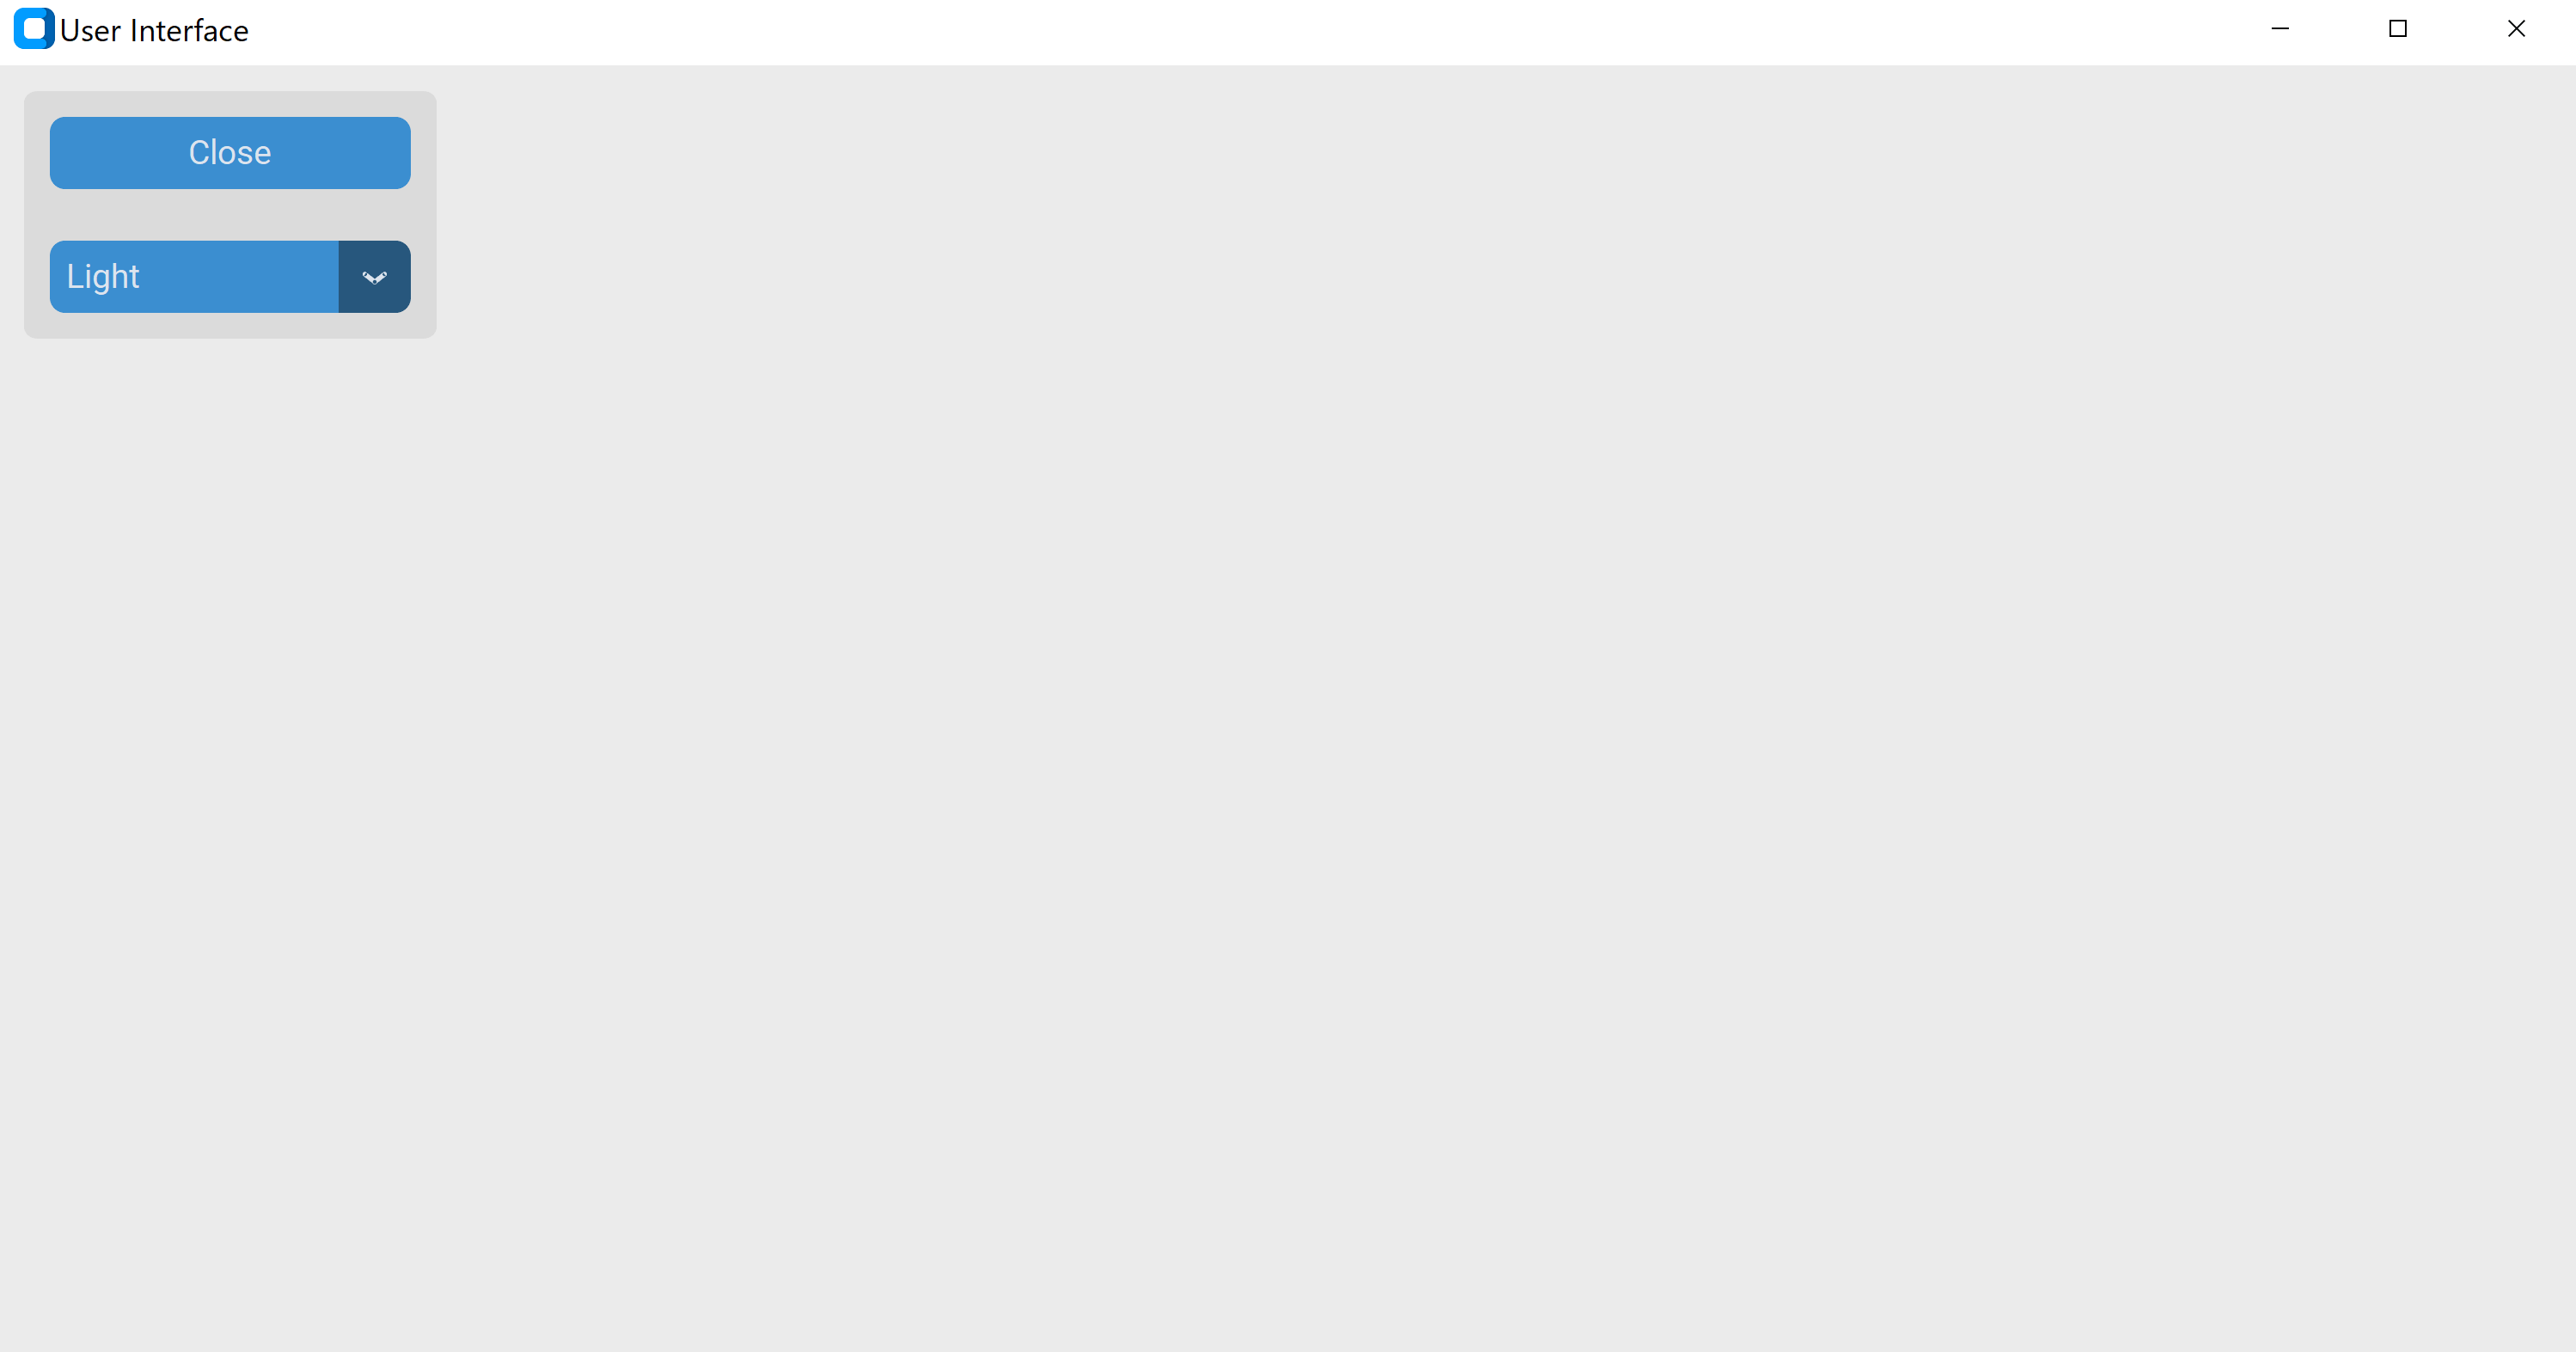

You can close the window with the "Close Button".
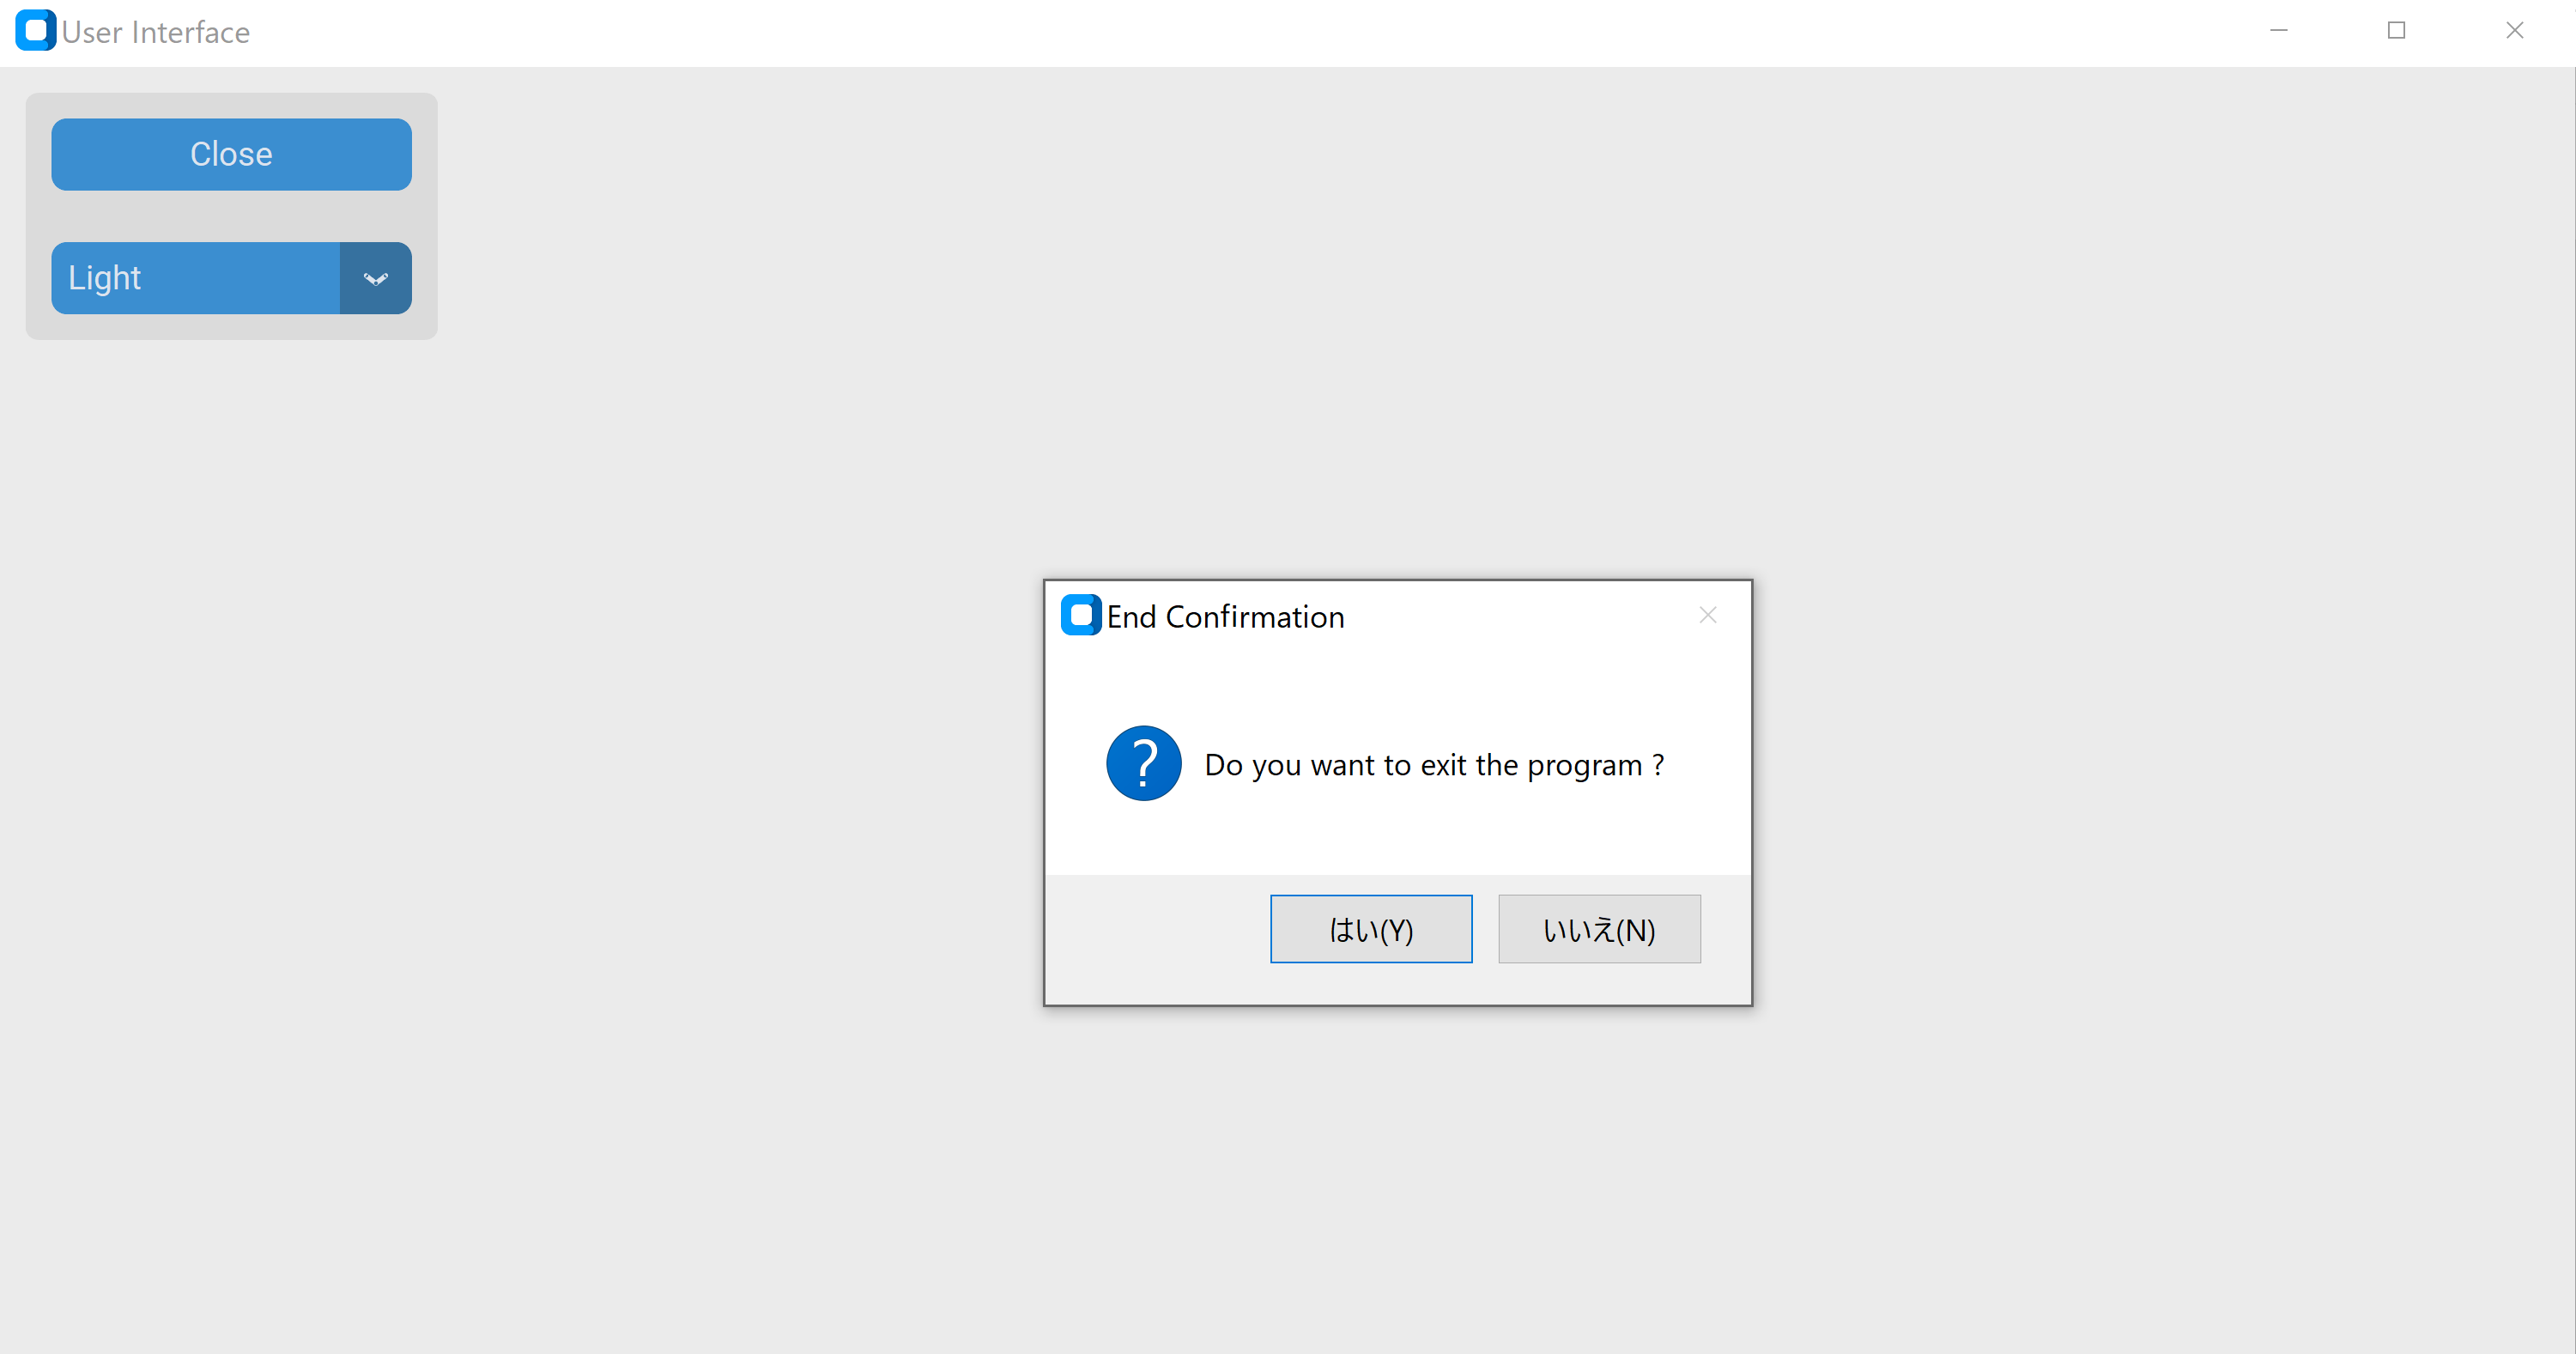

The "Light button" allows you to change the color of the window.
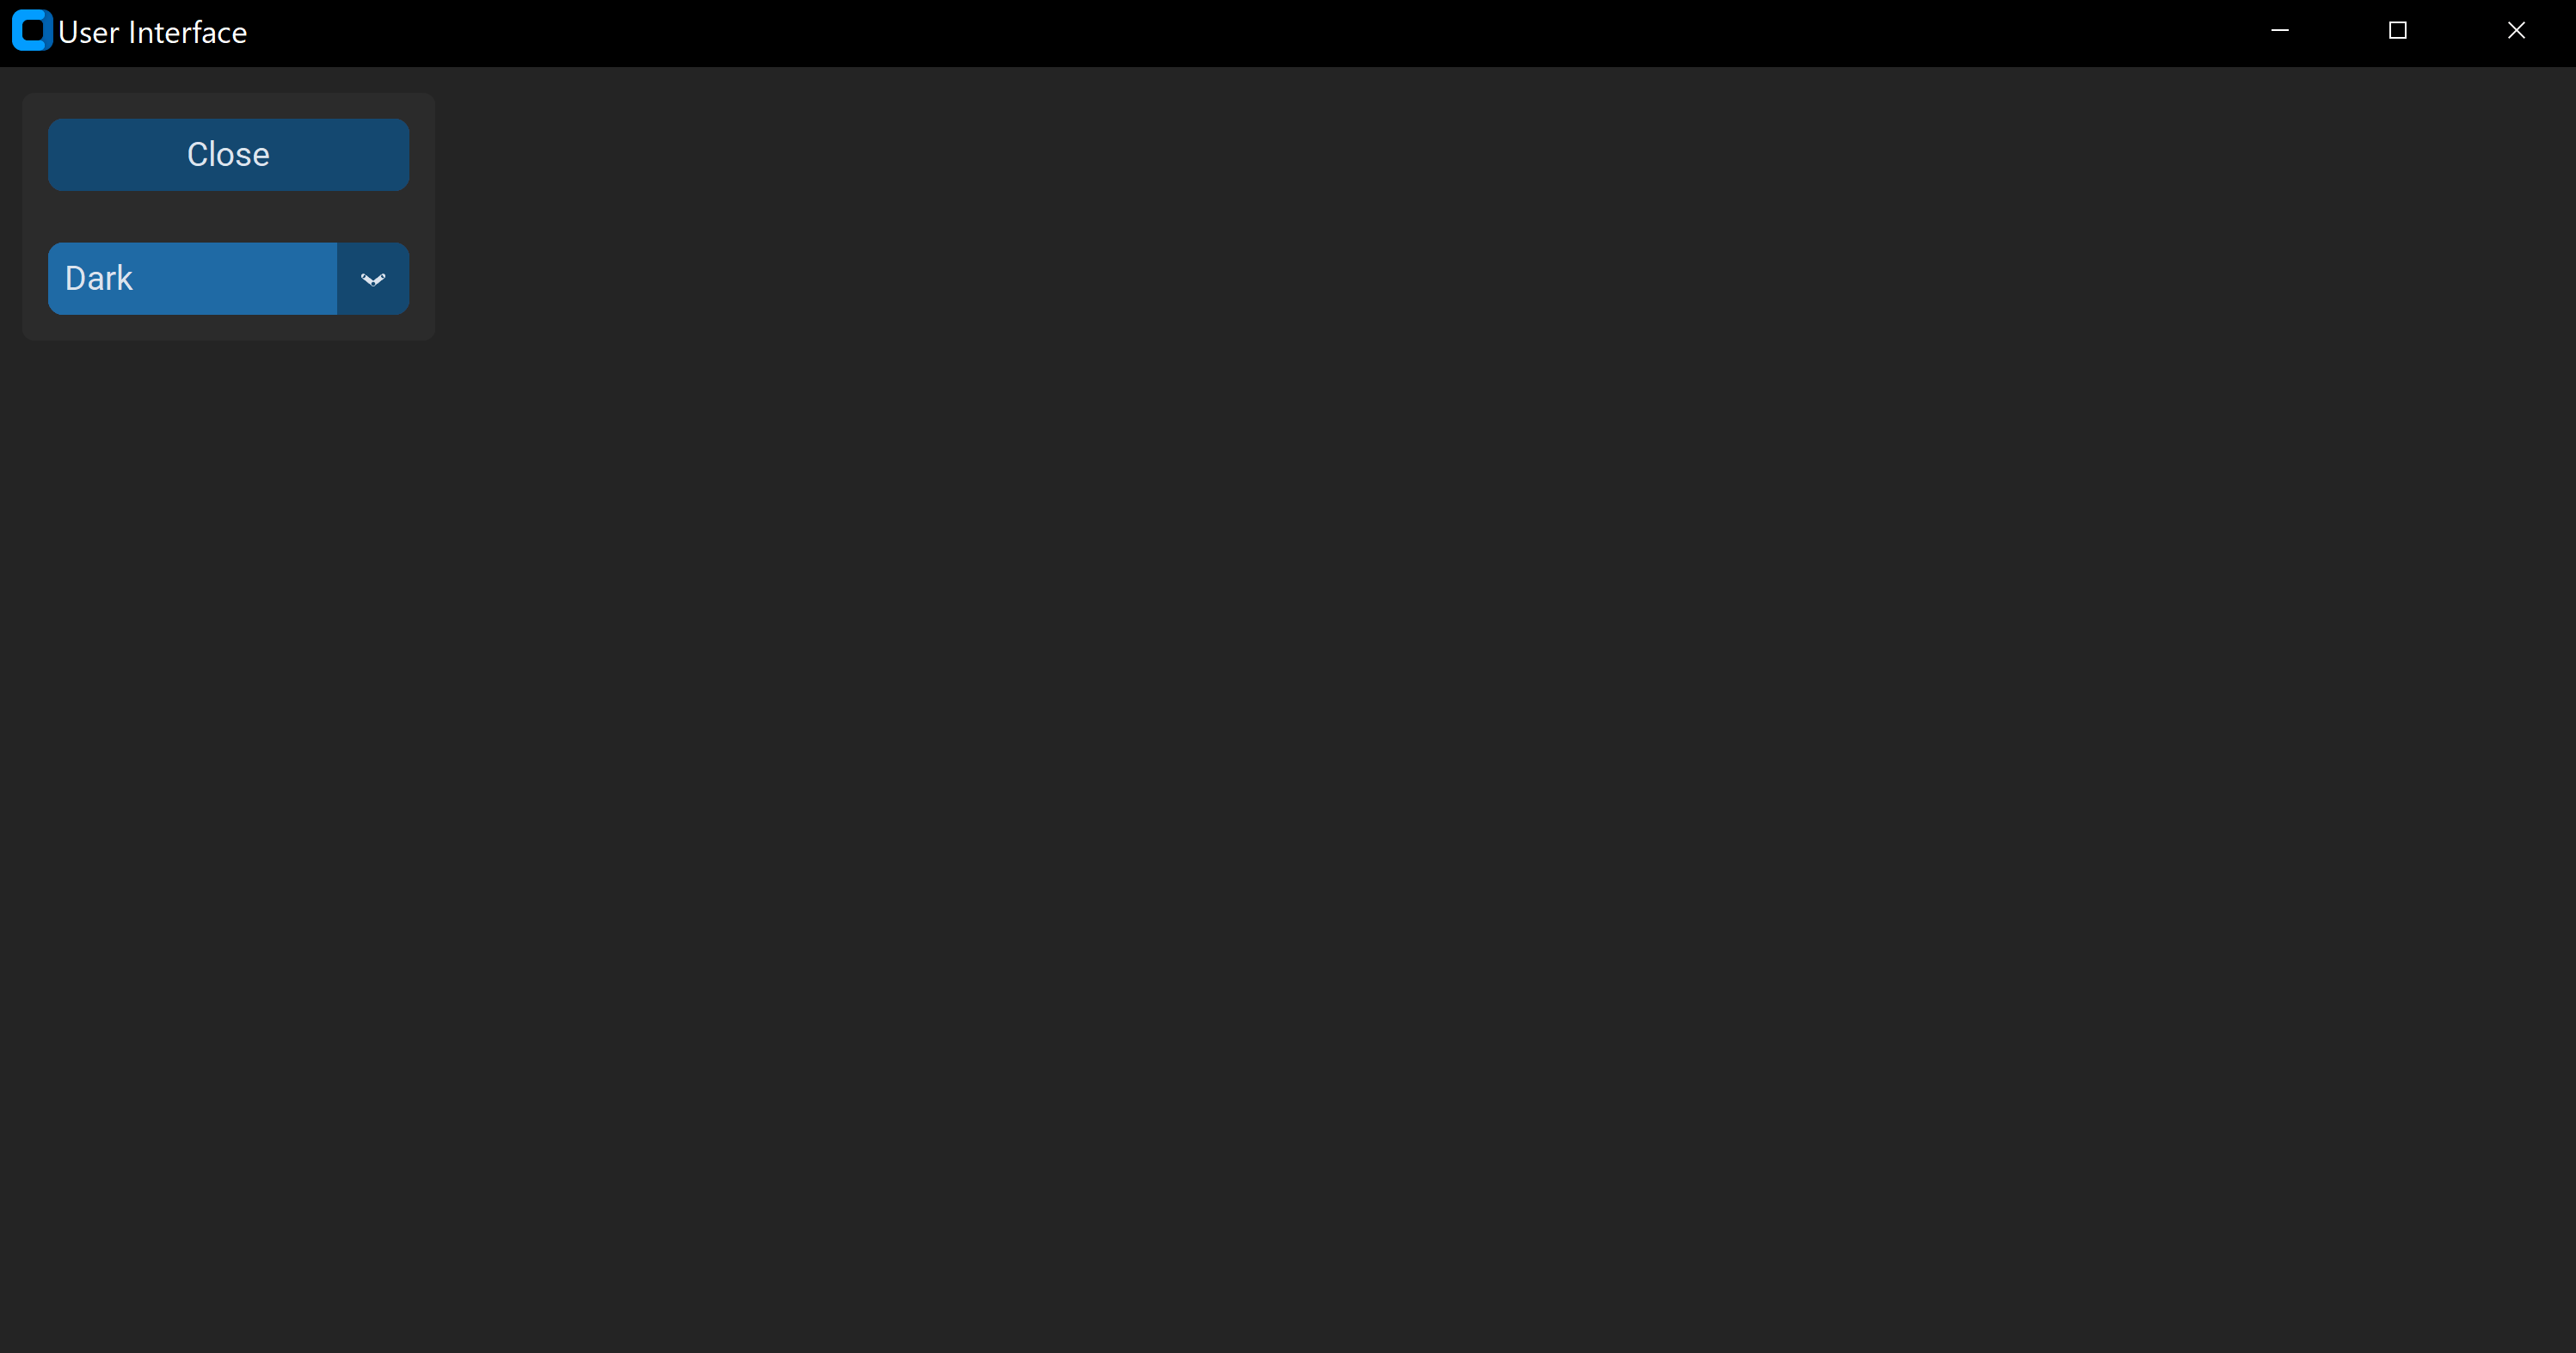

## 3.Open Serial Port

When you have completed the menu frame, the next step is to decide on the placement of the main frame.

In this exercise, we will implement the following functions in the main frame.
"Serial Port Configuration"
"Serial Port Recognition"
"Serial port connection"
"Data transmission/reception"
"Raw data display"

First, let‘s set up the connection for communication between the satellite and ground stations.（Serial Port Configuration）
The elements required to set up a serial port are the type of PC, the communication speed, and the port recognition and connection. After these four items are set, the connection to the ground station is measured.

### 3-1.RadioButton function

Let's place the size of the frame．After placement, add a button. This button will be used to set Windows or Linux, and is described as follows.
The button uses the customtkinter.CTkRadioButton function. The function also determines whether the button is for Windows ”1” or Linux ”2”, as shown on the next page, to enable the button switching.

Let's run the following program.Windows and Linux selection buttons will appear.

In [15]:
from tkinter import *
import customtkinter
from tkinter import messagebox
from tkinter import filedialog

class hepta_sat_gs(customtkinter.CTk):
    WIDTH = 1000                                                                # Screen Size for x
    HEIGHT = 500                                                                # Screen Size for y
    customtkinter.set_appearance_mode("Light")                      # Modes: "System" (standard), "Dark", "Light"
    customtkinter.set_default_color_theme("blue")                  # Themes: "blue" (standard), "green", "dark-blue"  
    
    def __init__(self):
        super().__init__()
        self.title("User Interface")                                            # Set the Title
        self.geometry(f"{hepta_sat_gs.WIDTH}x{hepta_sat_gs.HEIGHT}")            # Perform size adjustment
        self.menu_window()                                                      # call .menu window()
        self.set_window()                                                      # call .main window()
        self.protocol("WM_DELETE_WINDOW", self.delete_window)                   # call .delete_window() when app gets closed
    
    def delete_window(self,event=0):
        ret = messagebox.askyesno(title = "End Confirmation",message = "Do you want to exit the program ?")
        if ret == True:
            self.destroy()
    
    def change_appearance_mode(self, new_appearance_mode):
        customtkinter.set_appearance_mode(new_appearance_mode)        
        
    def menu_window(self):                                                      # setting menu Frame & widget
        self.menu_frm = customtkinter.CTkFrame(master=self,width=150,corner_radius=5)
        self.menu_frm.grid(row=0, column=0, sticky="nswe",padx=10,pady=10)      # adapt to window

    #file_btn
        self.close_menu = customtkinter.CTkButton(master=self.menu_frm,text="Close",command=self.delete_window)
        self.close_menu.grid(row=0, column=0, pady=10, padx=10,sticky="nswe")
        
    # label_mode
        self.home_menu = customtkinter.CTkOptionMenu(master=self.menu_frm,
                                                     values=["Light", "Dark"],command=self.change_appearance_mode)
        self.home_menu.grid(row=1, column=0, pady=10, padx=10,sticky="nswe")

    def set_window(self):                                                      # setting main Frame & widget
        self.main_frm = customtkinter.CTkFrame(master=self,width=150,corner_radius=5)
        self.main_frm.grid(row=0,column=1,sticky="nswe",padx=10,pady=10)        # adapt to window & padding(spacing) x,y 
    
    # set_frm
        self.set_lbl = customtkinter.CTkFrame(master=self.main_frm,width=150,height=10,corner_radius=5)
        self.set_lbl.grid(row=0,column=0,pady=10, padx=10,sticky="nswe")
        
    # os select
        self.button_ver = IntVar()
        self.radio_win = customtkinter.CTkRadioButton(master=self.set_lbl,
                                                      variable = self.button_ver,value=1,text="windows")
        self.radio_win.grid(row=0, column=0, pady=10, padx=10, sticky="nswe")
        self.radio_Lnx = customtkinter.CTkRadioButton(master=self.set_lbl,
                                                      variable = self.button_ver,value=2,text="Linux")
        self.radio_Lnx.grid(row=0, column=1, pady=10, padx=10, sticky="nswe")
        self.button_ver.set(1)
    
# =============================================================================
# Main Sequence
# =============================================================================    
if __name__ == "__main__":
    app = hepta_sat_gs()
    app.mainloop()

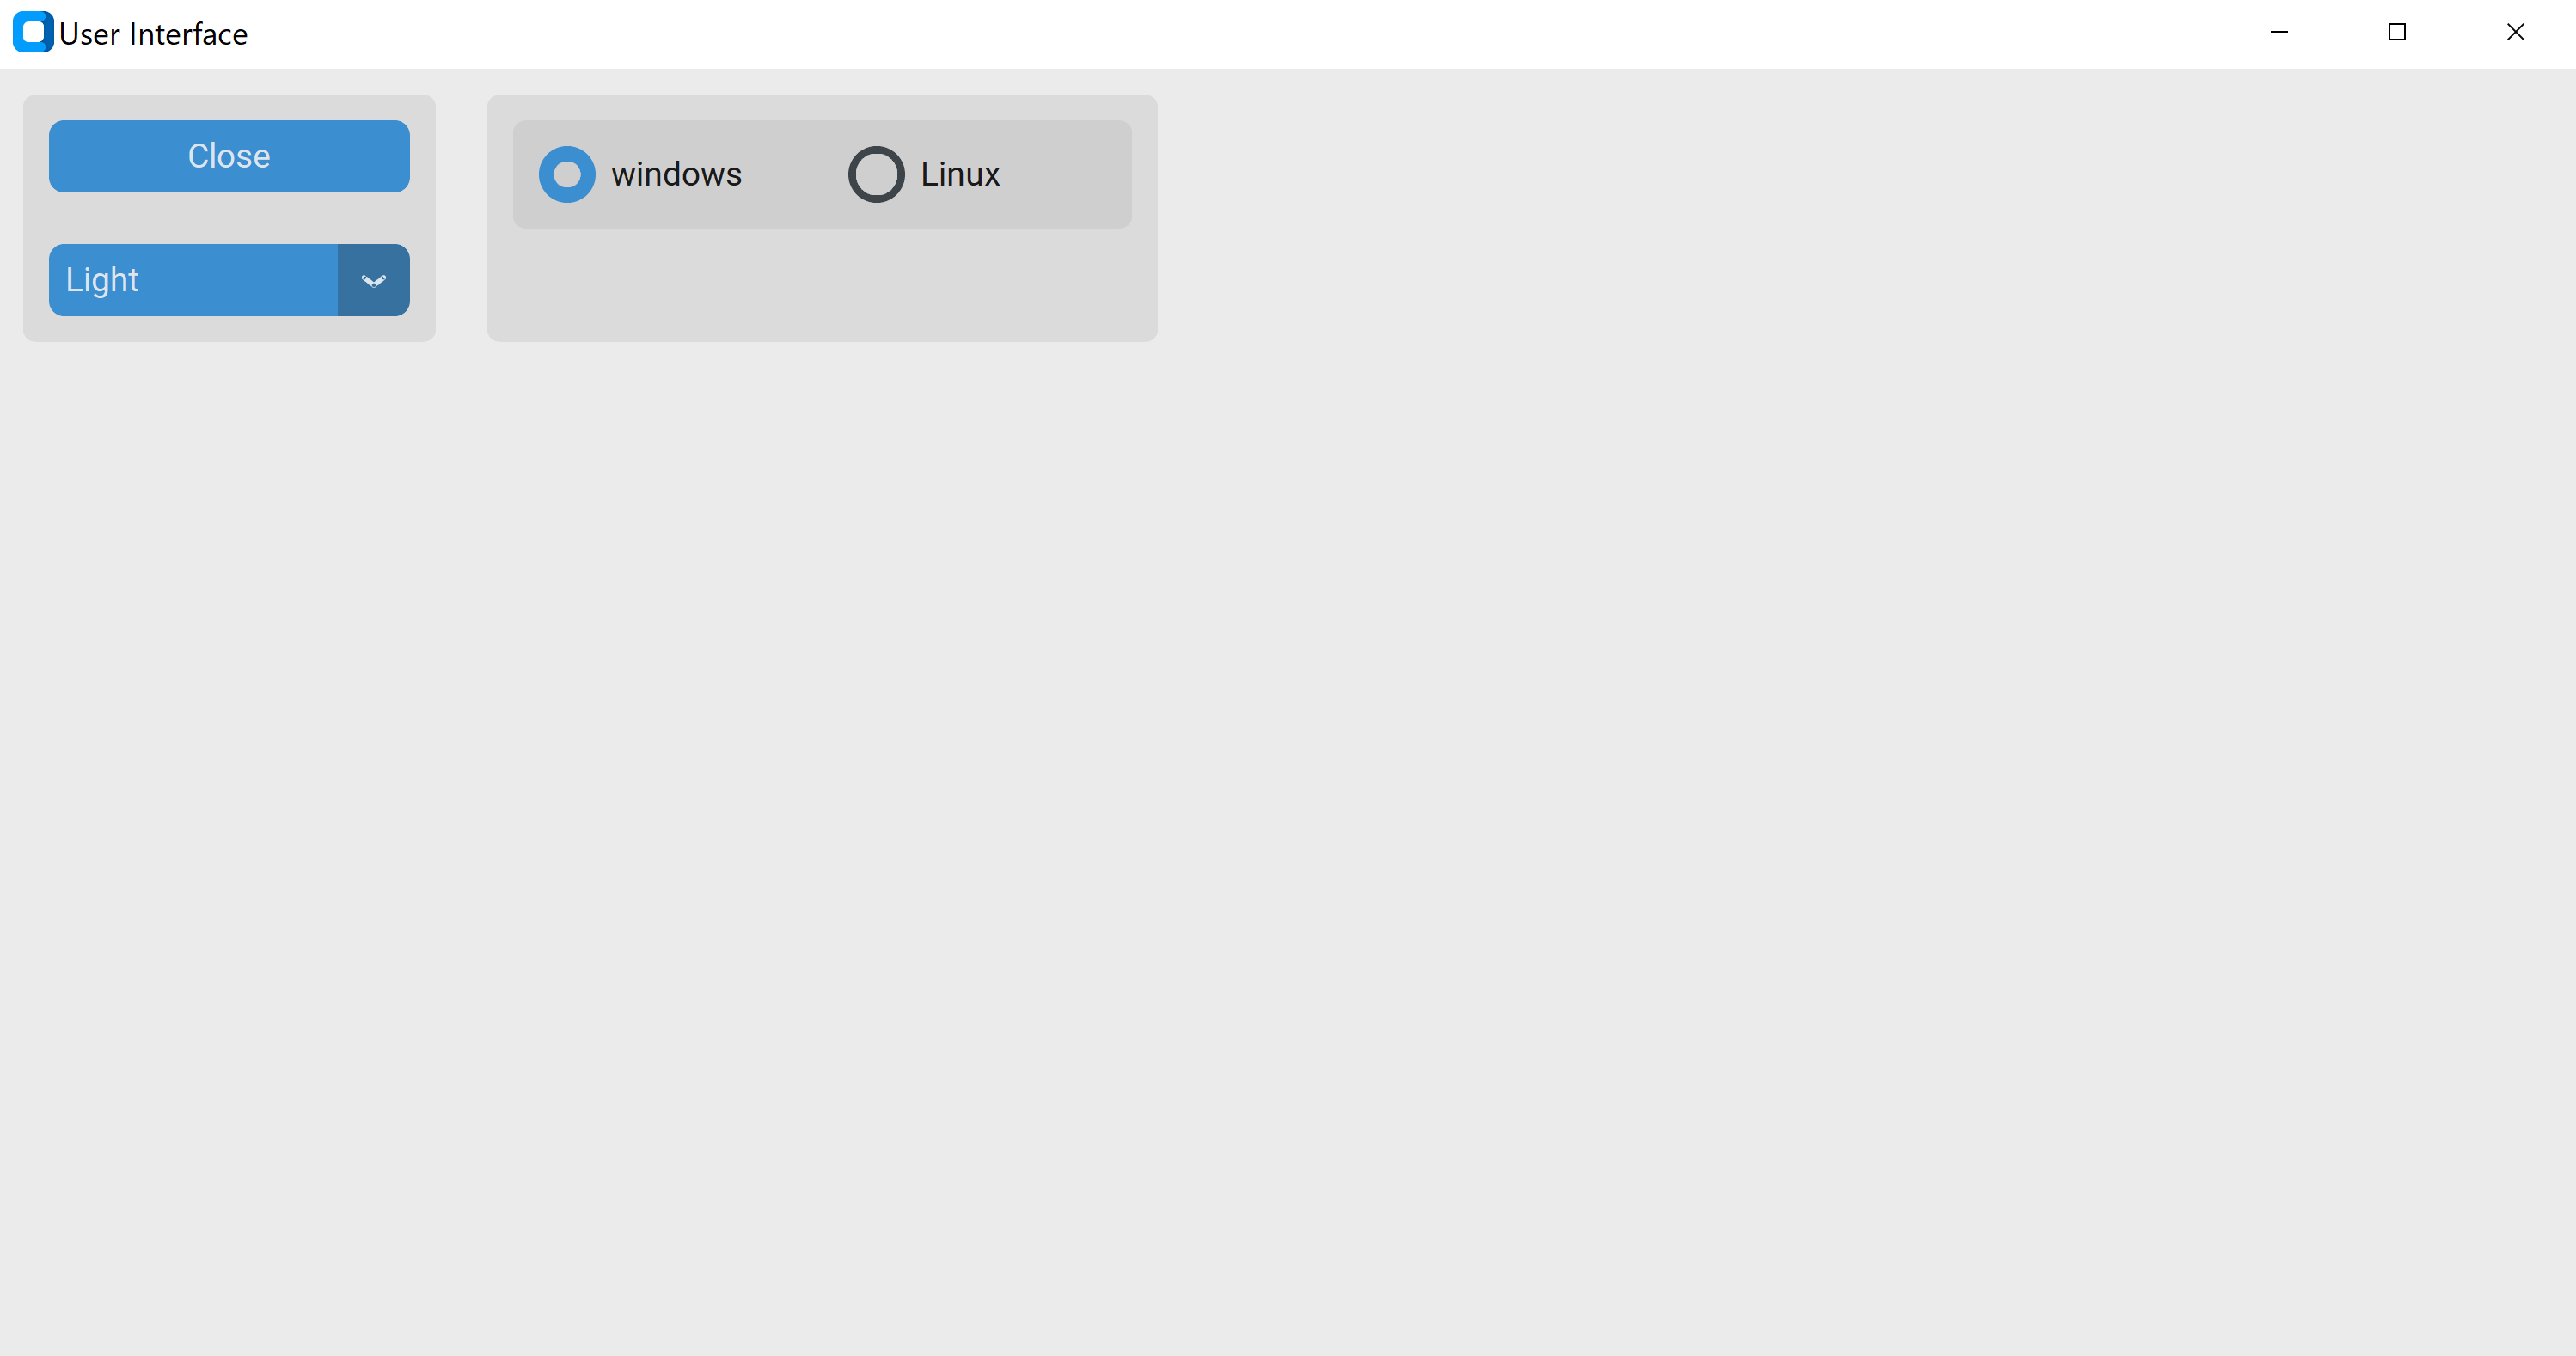

### 3-2.Serial Port Setting

After the OS (Windows/Linux) select’s function is complete, search for the serial port number. Although it is possible to see the serial port number in the device manager or Tera Term without searching, it is inefficient to check the serial port number via the device manager or Tera Term at the beginning of each session. Therefore, we will implement a serial port search function in the GUI.
The following module is used. Add "import" at the top of the code.
Import serial 
The serial module is not a standard Python module, so please install it with "Pyserial".
This module is used to communicate with serial devices such as Mbed and Arudino.
Import sys (This module is used to find out which platform is being used and to get the boot parameters of the OS)
Import glob (give a file matching condition to the glob function as an argument and it will return the file matching the condition.)
import os (These are modules that enable file and directory operations for various OS-dependent functions.) 

In the serial_port function, first, whether the device is for windows or Linux is determined by the platform.startswith in the sys module. In the case of Windows, the function searches for a "COM" port. Otherwise, "/dev/tty.*" is searched.

Run the following program to specify the COM port and BaudRate settings.

In [3]:
from tkinter import *
import customtkinter
from tkinter import messagebox
from tkinter import filedialog
import sys
import serial

class hepta_sat_gs(customtkinter.CTk):
    WIDTH = 1000                                                                # Screen Size for x
    HEIGHT = 500                                                                # Screen Size for y
    customtkinter.set_appearance_mode("Light")                      # Modes: "System" (standard), "Dark", "Light"
    customtkinter.set_default_color_theme("blue")                  # Themes: "blue" (standard), "green", "dark-blue"  
    
    def __init__(self):
        super().__init__()
        self.title("User Interface")                                            # Set the Title
        self.geometry(f"{hepta_sat_gs.WIDTH}x{hepta_sat_gs.HEIGHT}")            # Perform size adjustment
        self.menu_window()                                                      # call .menu window()
        self.set_window()                                                      # call .main window()
        self.protocol("WM_DELETE_WINDOW", self.delete_window)                   # call .delete_window() when app gets closed
    
    def delete_window(self,event=0):
        ret = messagebox.askyesno(title = "End Confirmation",message = "Do you want to exit the program ?")
        if ret == True:
            self.destroy()
    
    def change_appearance_mode(self, new_appearance_mode):
        customtkinter.set_appearance_mode(new_appearance_mode)        

    def serial_ports(self):
        """ Lists serial port names
            :raises EnvironmentError:
                On unsupported or unknown platforms
            :returns:
                A list of the serial ports available on the system
        """
        if sys.platform.startswith('win'):
            ports = ['COM%s' % (i + 1) for i in range(256)]
        elif sys.platform.startswith('linux') or sys.platform.startswith('cygwin'):
            # this excludes your current terminal "/dev/tty"
            ports = glob.glob('/dev/tty[A-Za-z]*')
        elif sys.platform.startswith('darwin'):
            ports = glob.glob('/dev/tty.*')
        else:
            raise EnvironmentError('Unsupported platform')
        result = []
        for port in ports:
            try:
                s = serial.Serial(port)
                s.close()
                result.append(port)
            except (OSError, serial.SerialException):
                pass
        return result
    
    def menu_window(self):                                                      # setting menu Frame & widget
        self.menu_frm = customtkinter.CTkFrame(master=self,width=150,corner_radius=5)
        self.menu_frm.grid(row=0, column=0, sticky="nswe",padx=10,pady=10)      # adapt to window

    #file_btn
        self.close_menu = customtkinter.CTkButton(master=self.menu_frm,text="Close",command=self.delete_window)
        self.close_menu.grid(row=0, column=0, pady=10, padx=10,sticky="nswe")
        
    # label_mode
        self.home_menu = customtkinter.CTkOptionMenu(master=self.menu_frm,
                                                     values=["Light", "Dark"],command=self.change_appearance_mode)
        self.home_menu.grid(row=1, column=0, pady=10, padx=10,sticky="nswe")

    def set_window(self):                                                      # setting main Frame & widget
        self.main_frm = customtkinter.CTkFrame(master=self,width=150,corner_radius=5)
        self.main_frm.grid(row=0,column=1,sticky="nswe",padx=10,pady=10)        # adapt to window & padding(spacing) x,y 
    
    # set_frm
        self.set_lbl = customtkinter.CTkFrame(master=self.main_frm,width=150,height=10,corner_radius=5)
        self.set_lbl.grid(row=0,column=0,pady=10, padx=10,sticky="nswe")
        self.set_frm = customtkinter.CTkFrame(master=self.main_frm,width=150,height=10,corner_radius=5)
        self.set_frm.grid(row=1,column=0,pady=10, padx=10,sticky="nswe")
        
    # os select
        self.button_ver = IntVar()
        self.radio_win = customtkinter.CTkRadioButton(master=self.set_lbl,
                                                      variable = self.button_ver,value=1,text="windows")
        self.radio_win.grid(row=0, column=0, pady=10, padx=10, sticky="nswe")
        self.radio_Lnx = customtkinter.CTkRadioButton(master=self.set_lbl,
                                                      variable = self.button_ver,value=2,text="Linux")
        self.radio_Lnx.grid(row=0, column=1, pady=10, padx=10, sticky="nswe")
        self.button_ver.set(1)

    # set_btn
        self.baud_label = customtkinter.CTkLabel(master=self.set_frm,width=80,height=10,
                                                  text="Baud Rate",font=("Roboto Medium",14))
        self.baud_label.grid(row=0,column=0,pady=10,padx=10,sticky="nswe")
        self.port_label = customtkinter.CTkLabel(master=self.set_frm,width=80,height=10,
                                                  text="PORT",font=("Roboto Medium",14))
        self.port_label.grid(row=1,column=0,pady=10,padx=10,sticky="nswe")
        
        self.baud_entry = customtkinter.CTkEntry(master=self.set_frm,width=100,height=10)
        self.baud_entry.grid(row=0,column=1,pady=10,padx=10,sticky="nswe")    
        
    # serial port
        port_num = []
        port_num = self.serial_ports()
        # print(port_num)
        self.port_entry = customtkinter.CTkOptionMenu(master=self.set_frm,width=100,height=10,values=port_num)
        self.port_entry.grid(row=1,column=1,pady=10,padx=10,sticky="nswe")     
    
# =============================================================================
# Main Sequence
# =============================================================================    
if __name__ == "__main__":
    app = hepta_sat_gs()
    app.mainloop()

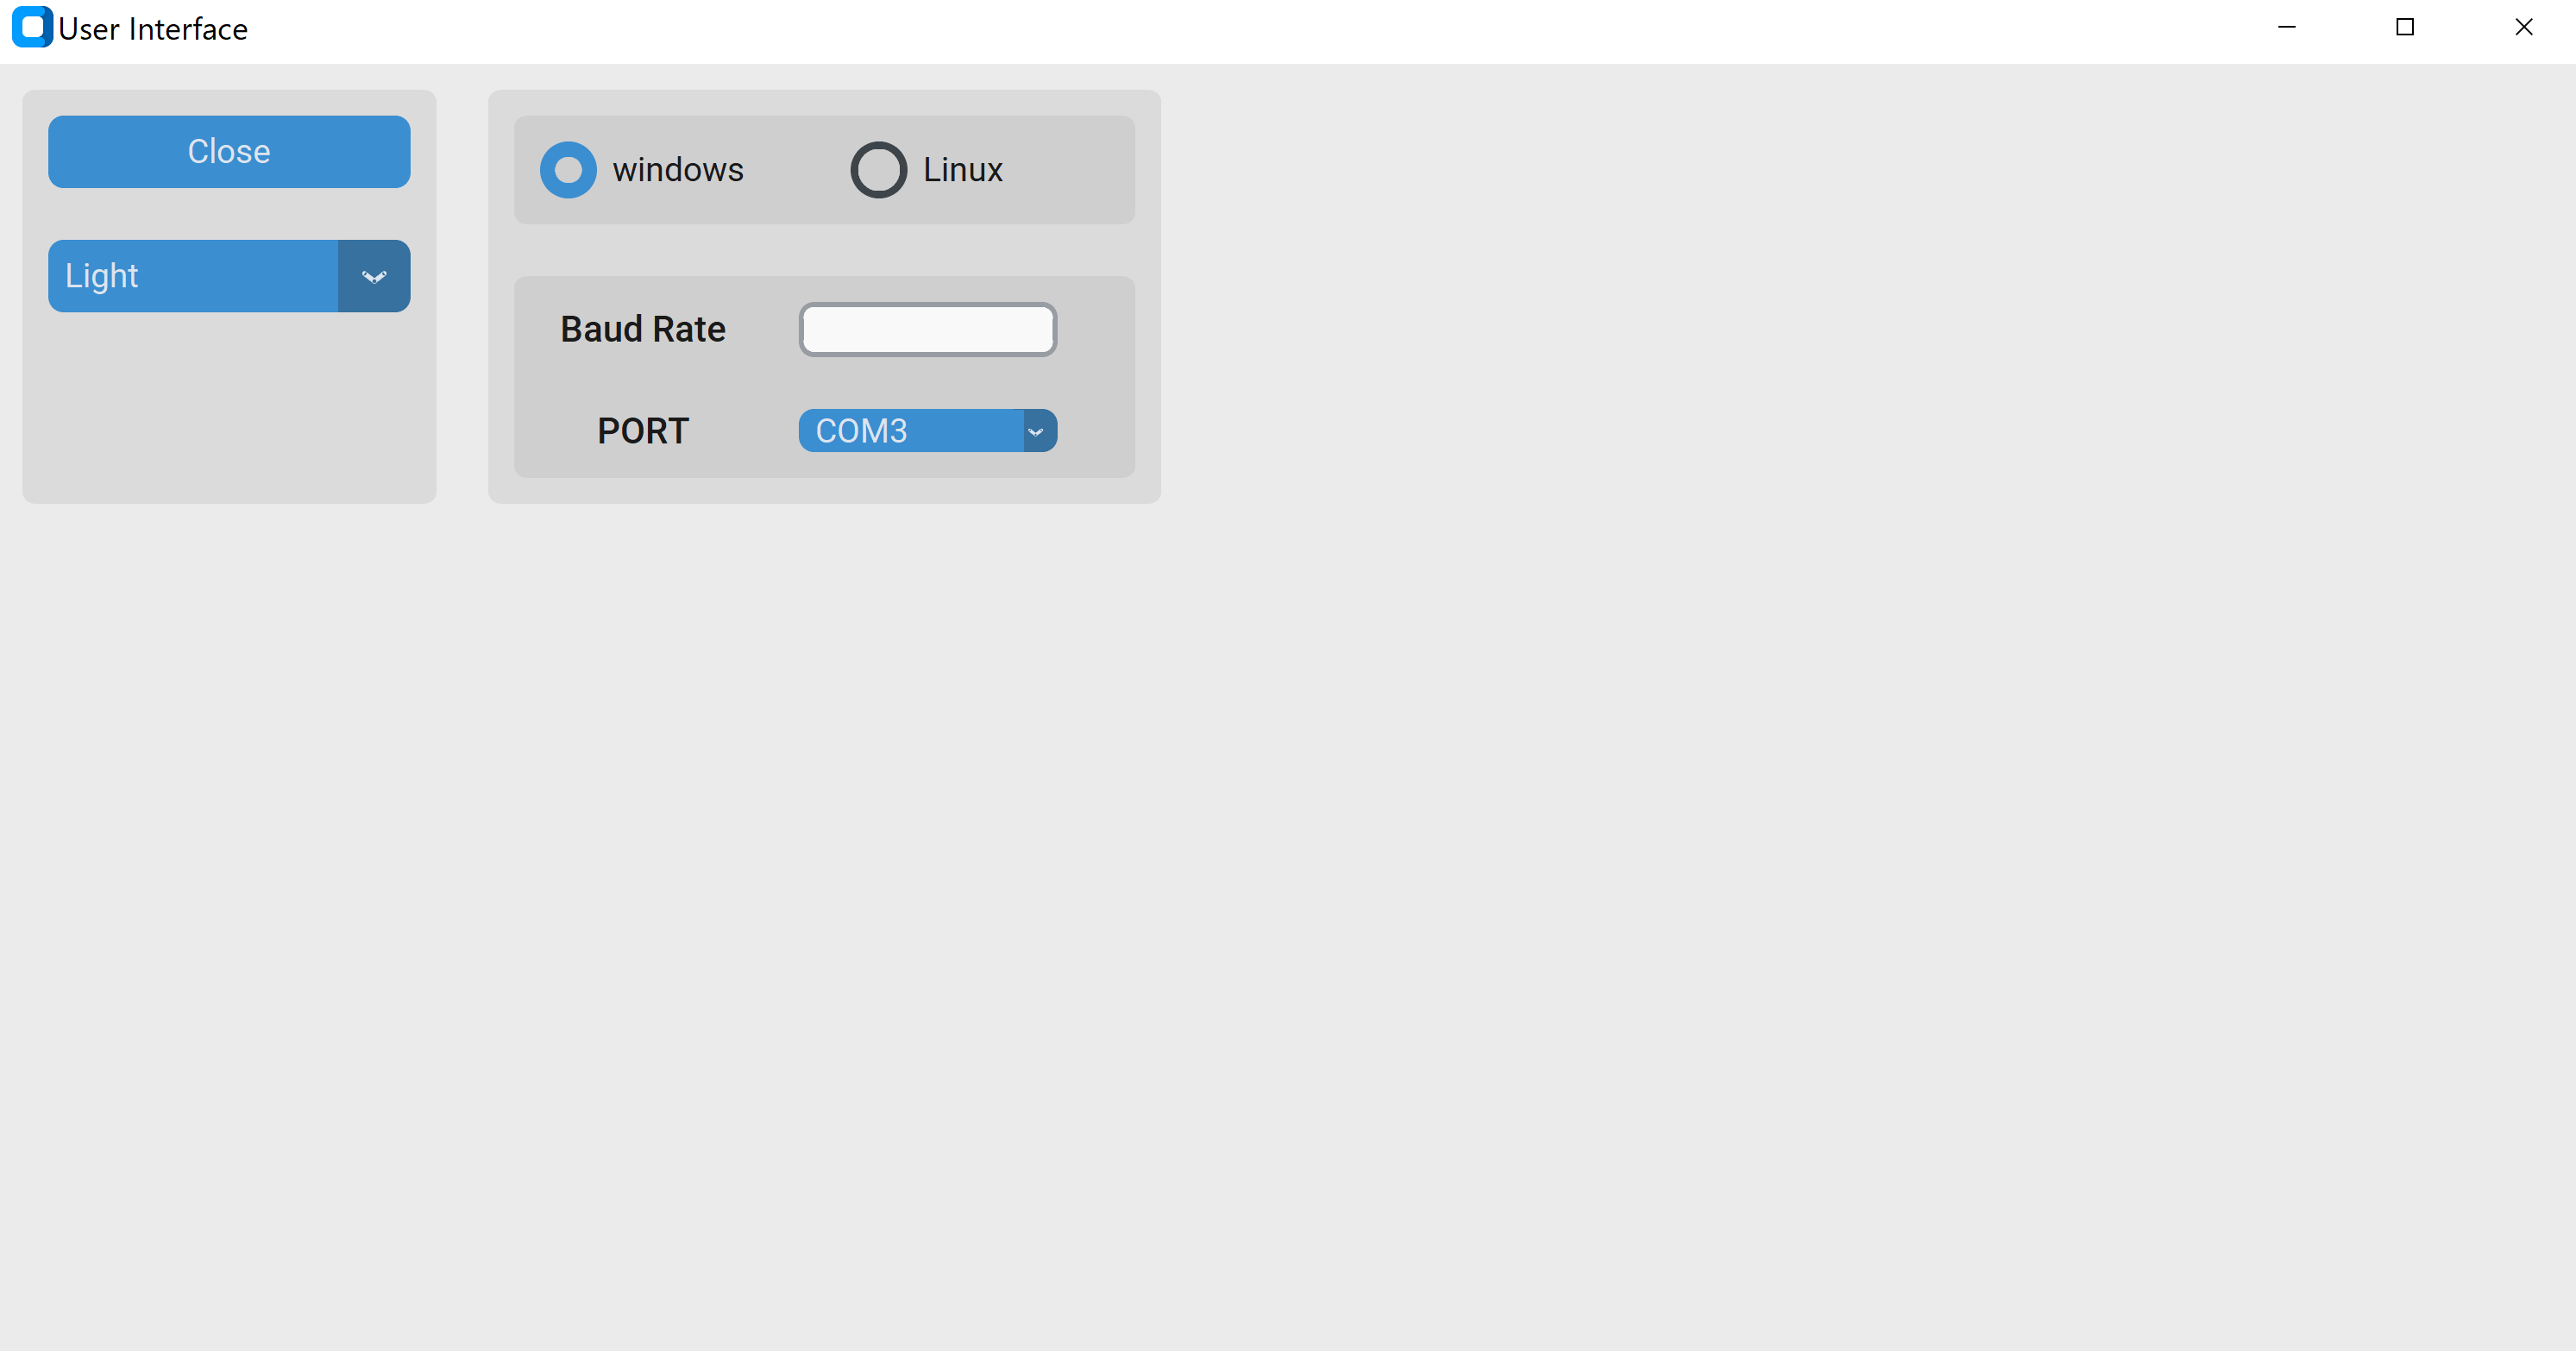

### 3-3.Connect and Disconnect

After the serial_port function has confirmed the port number, the next step is to implement the connect and disconnect functions.．
The serial port connection is determined by the connect function; prepare the variable version_ and add import serial at the beginning of the code to use the serial module to recognize the pre-determined serial port.
If even one item is not selected, version_=0 and an error occurs.

A disconnect function is also provided to disconnect a connected serial port. The only way to disconnect is to use the close function.
Therefore, no special import module is required

In addition, set up the get_data function.
The required module is “import sys” and “import threading”
The get_data function is used for serial port recognition and data acquisition from the satellite. This function reads one line of data stored in serial_object using the readline function.

Let's run the following program to control the Connect and Disconnect states of the COM port. mbed is connected to a PC, and mbed is connected to the serial communication port of the PC.

In [ ]:
from tkinter import *
import customtkinter
from tkinter import messagebox
from tkinter import filedialog
import sys
import serial
import threading

class hepta_sat_gs(customtkinter.CTk):
    WIDTH = 1000                                                                # Screen Size for x
    HEIGHT = 500                                                                # Screen Size for y
    customtkinter.set_appearance_mode("Light")                      # Modes: "System" (standard), "Dark", "Light"
    customtkinter.set_default_color_theme("blue")                  # Themes: "blue" (standard), "green", "dark-blue"  
    
    def __init__(self):
        super().__init__()
        self.title("User Interface")                                            # Set the Title
        self.geometry(f"{hepta_sat_gs.WIDTH}x{hepta_sat_gs.HEIGHT}")            # Perform size adjustment
        self.menu_window()                                                      # call .menu window()
        self.set_window()                                                      # call .main window()
        self.protocol("WM_DELETE_WINDOW", self.delete_window)                   # call .delete_window() when app gets closed
    
    def delete_window(self,event=0):
        ret = messagebox.askyesno(title = "End Confirmation",message = "Do you want to exit the program ?")
        if ret == True:
            self.destroy()
    
    def change_appearance_mode(self, new_appearance_mode):
        customtkinter.set_appearance_mode(new_appearance_mode)        

    def serial_ports(self):
        """ Lists serial port names
            :raises EnvironmentError:
                On unsupported or unknown platforms
            :returns:
                A list of the serial ports available on the system
        """
        if sys.platform.startswith('win'):
            ports = ['COM%s' % (i + 1) for i in range(256)]
        elif sys.platform.startswith('linux') or sys.platform.startswith('cygwin'):
            # this excludes your current terminal "/dev/tty"
            ports = glob.glob('/dev/tty[A-Za-z]*')
        elif sys.platform.startswith('darwin'):
            ports = glob.glob('/dev/tty.*')
        else:
            raise EnvironmentError('Unsupported platform')
        result = []
        for port in ports:
            try:
                s = serial.Serial(port)
                s.close()
                result.append(port)
            except (OSError, serial.SerialException):
                pass
        return result

    def connect(self):
        version_ = self.button_ver.get()
        global serial_object
        port = self.port_entry.get()
        baud = self.baud_entry.get()
        try:
            if version_ == 2:
                try:
                    serial_object = serial.Serial('/dev/tty'+str(port),baud)
                except:
                    print("Can't Open Specified Port")
            elif version_ == 1:
                serial_object = serial.Serial(str(port),baud,timeout=0.1)
            elif version_ == 0:
                print("Enter Baud and Port")
                return
        except ValueError:
            print("Enter Baud and Port")
            return
        t1 = threading.Thread(target = self.get_data)
        t1.start()
        
    def disconnect(self):
        global flag
        flag = False
        try:
            serial_object.close()
            print("finish Using it ....")
        except AttributeError:
            print("without Using it ....")
            pass

    def get_data(self):
        global flag
        flag = True
        global filter_data
        while(flag):
            try:
                srl_data = serial_object.readline()
                if srl_data != b'':
                    filter_data = (str(srl_data.decode())).encode('utf-8')
                    print(filter_data)
            except TypeError:
                pass
            
    def menu_window(self):                                                      # setting menu Frame & widget
        self.menu_frm = customtkinter.CTkFrame(master=self,width=150,corner_radius=5)
        self.menu_frm.grid(row=0, column=0, sticky="nswe",padx=10,pady=10)      # adapt to window

    #file_btn
        self.close_menu = customtkinter.CTkButton(master=self.menu_frm,text="Close",command=self.delete_window)
        self.close_menu.grid(row=0, column=0, pady=10, padx=10,sticky="nswe")
        
    # label_mode
        self.home_menu = customtkinter.CTkOptionMenu(master=self.menu_frm,
                                                     values=["Light", "Dark"],command=self.change_appearance_mode)
        self.home_menu.grid(row=1, column=0, pady=10, padx=10,sticky="nswe")

    def set_window(self):                                                      # setting main Frame & widget
        self.main_frm = customtkinter.CTkFrame(master=self,width=150,corner_radius=5)
        self.main_frm.grid(row=0,column=1,sticky="nswe",padx=10,pady=10)        # adapt to window & padding(spacing) x,y 
    
    # set_frm
        self.set_lbl = customtkinter.CTkFrame(master=self.main_frm,width=150,height=10,corner_radius=5)
        self.set_lbl.grid(row=0,column=0,pady=10, padx=10,sticky="nswe")
        self.set_frm = customtkinter.CTkFrame(master=self.main_frm,width=150,height=10,corner_radius=5)
        self.set_frm.grid(row=1,column=0,pady=10, padx=10,sticky="nswe")
        
    # os select
        self.button_ver = IntVar()
        self.radio_win = customtkinter.CTkRadioButton(master=self.set_lbl,
                                                      variable = self.button_ver,value=1,text="windows")
        self.radio_win.grid(row=0, column=0, pady=10, padx=10, sticky="nswe")
        self.radio_Lnx = customtkinter.CTkRadioButton(master=self.set_lbl,
                                                      variable = self.button_ver,value=2,text="Linux")
        self.radio_Lnx.grid(row=0, column=1, pady=10, padx=10, sticky="nswe")
        self.button_ver.set(1)

    # set_btn
        self.baud_label = customtkinter.CTkLabel(master=self.set_frm,width=80,height=10,
                                                  text="Baud Rate",font=("Roboto Medium",14))
        self.baud_label.grid(row=0,column=0,pady=10,padx=10,sticky="nswe")
        self.port_label = customtkinter.CTkLabel(master=self.set_frm,width=80,height=10,
                                                  text="PORT",font=("Roboto Medium",14))
        self.port_label.grid(row=1,column=0,pady=10,padx=10,sticky="nswe")
        
        self.baud_entry = customtkinter.CTkEntry(master=self.set_frm,width=100,height=10)
        self.baud_entry.grid(row=0,column=1,pady=10,padx=10,sticky="nswe")    
        
    # serial port
        port_num = []
        port_num = self.serial_ports()
        # print(port_num)
        self.port_entry = customtkinter.CTkOptionMenu(master=self.set_frm,width=100,height=10,values=port_num)
        self.port_entry.grid(row=1,column=1,pady=10,padx=10,sticky="nswe")     

    # connect    
        self.connect_btn = customtkinter.CTkButton(master=self.set_frm,width=100,height=10,
                                                    text="Connect",font=("Roboto Medium",14),command=self.connect)
        self.connect_btn.grid(row=2,column=0,pady=10,padx=20,sticky="nswe")
        
    # disconnect
        self.disconnect_btn = customtkinter.CTkButton(master=self.set_frm,width=100,height=10,
                                                      text="Disconnect",font=("Roboto Medium",14),command=self.disconnect)
        self.disconnect_btn.grid(row=2,column=1,pady=10,padx=20,sticky="nswe")    
    
# =============================================================================
# Main Sequence
# =============================================================================    
if __name__ == "__main__":
    app = hepta_sat_gs()
    app.mainloop()

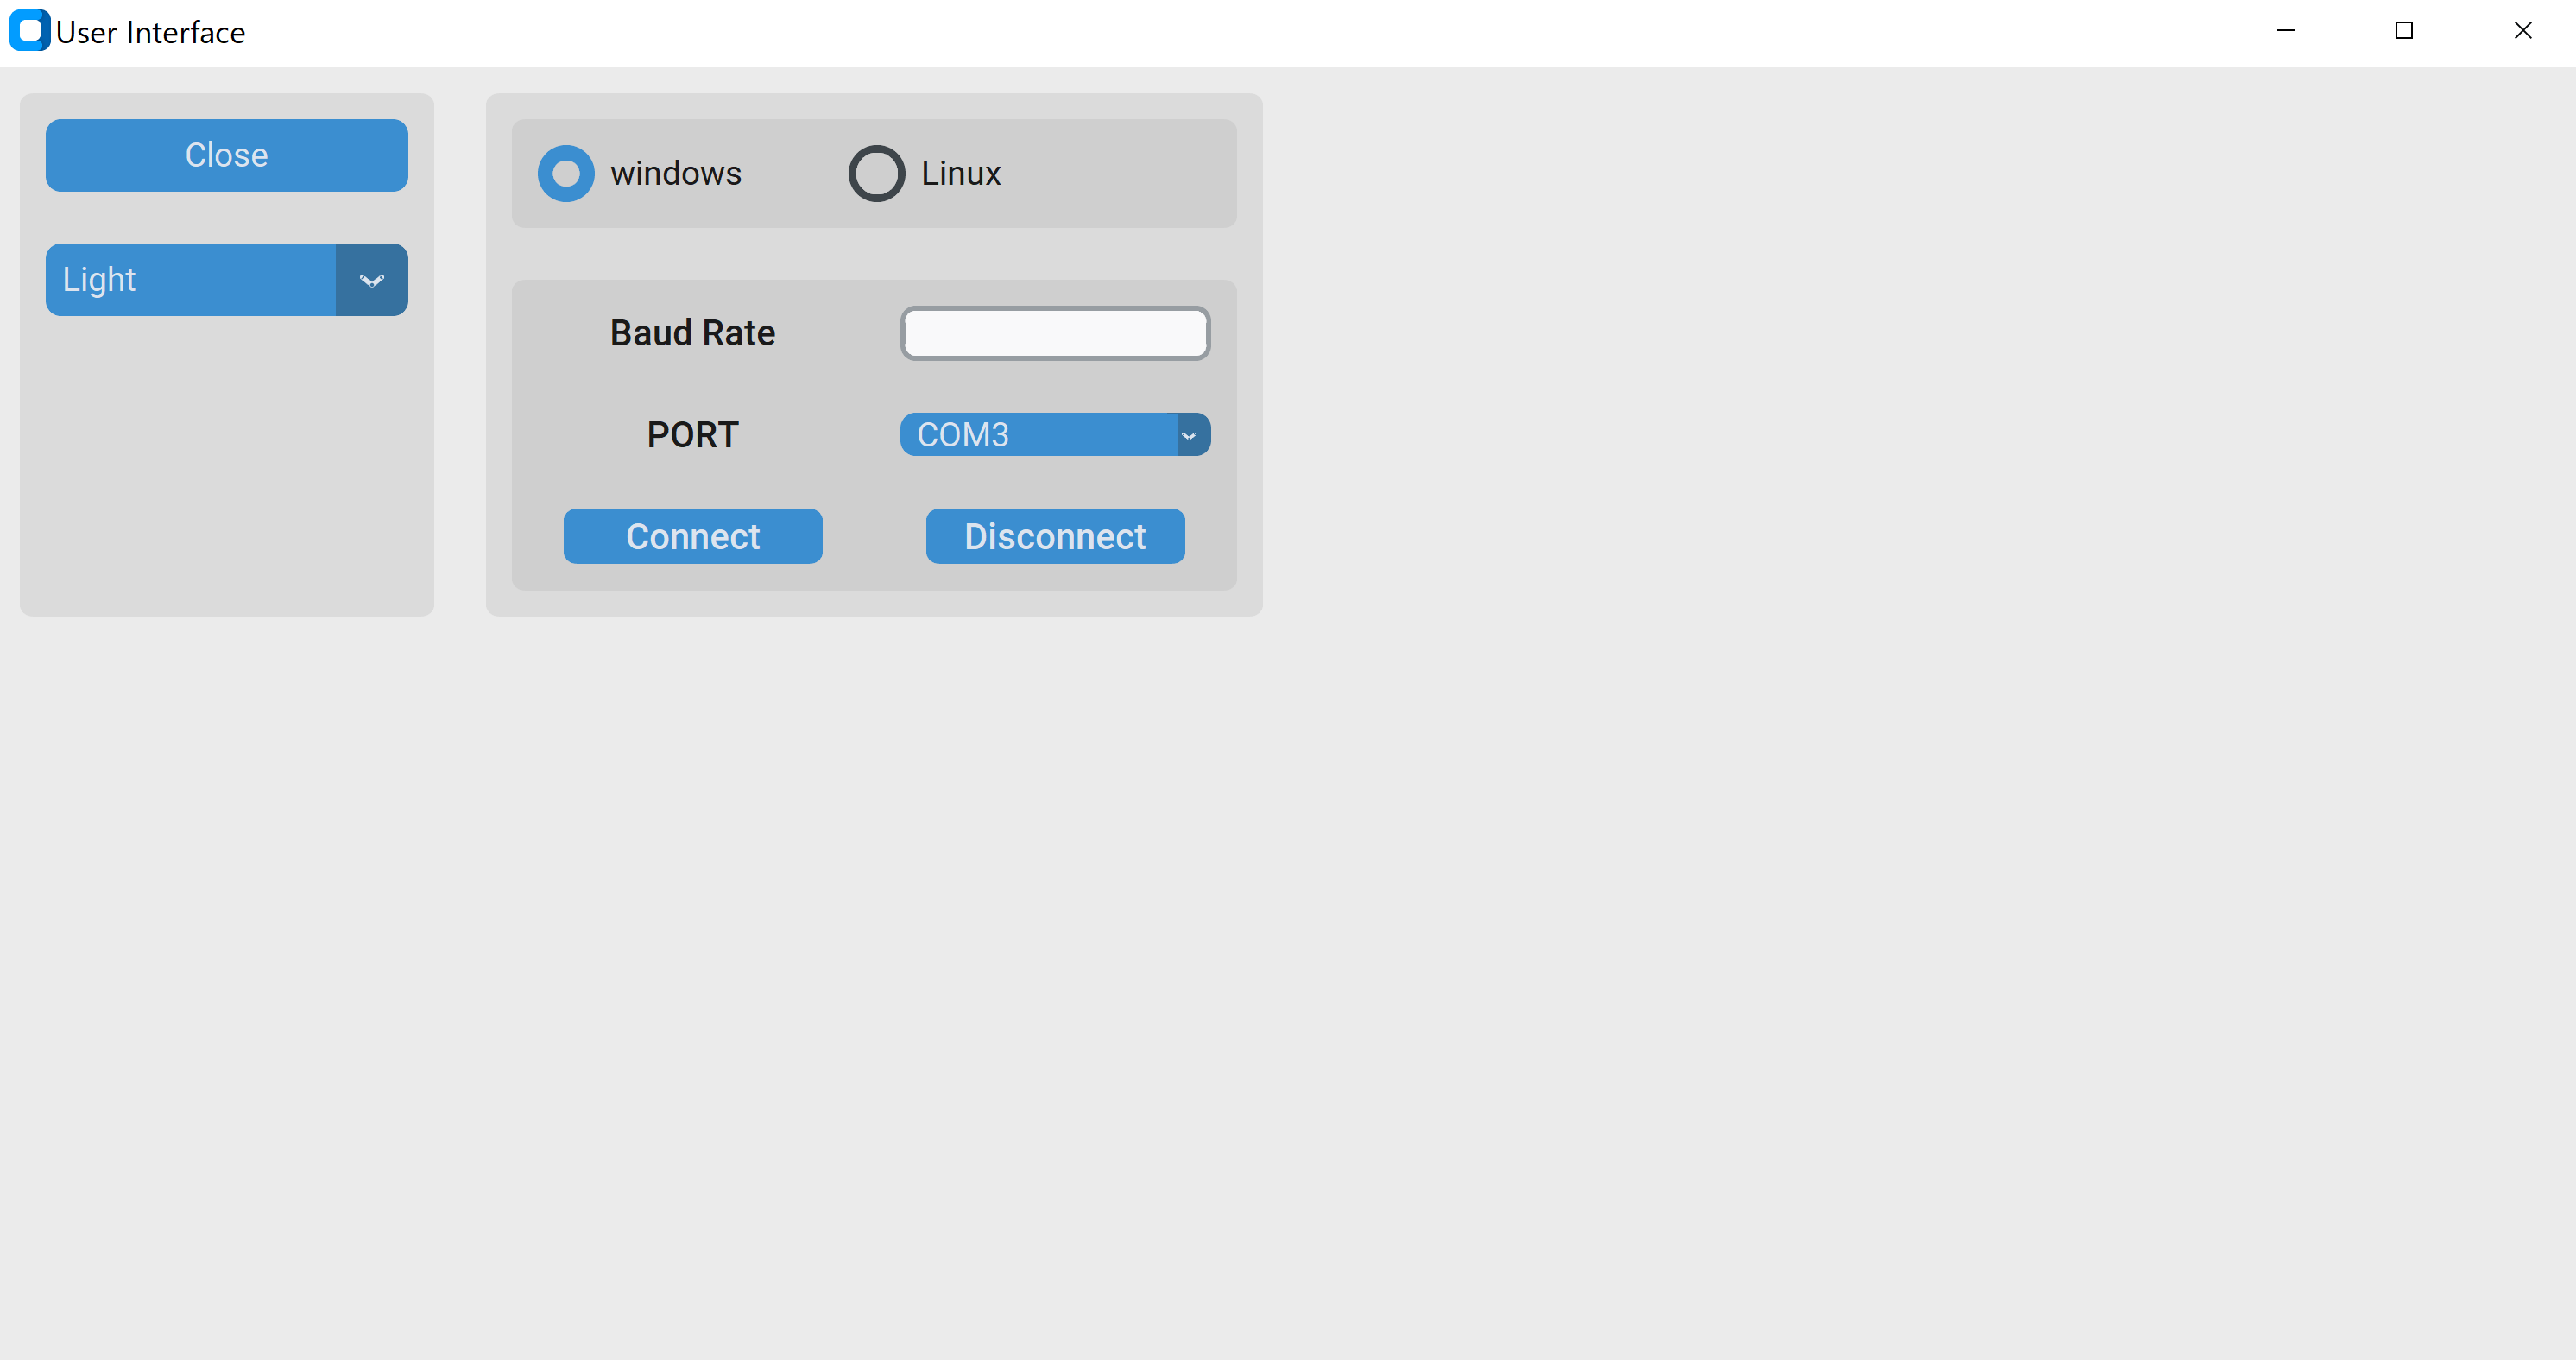

### 3-4.Receive and Transmit

First, let's create the frame and function for sending commands.
The function for sending commands is performed by the send function. The widget and the function are connected, and the get and write functions in the os module and the encode function are used to encode the data to be sent so that Mbed can recognize it.

Once the sending function is complete, the last received data can be displayed. To display text data, use tkinter's text function; to do so in Customtkinter, use the CTkEntry function. (Either can be used to create the widget.)
The font is set to Text in the configure method after the Text widget is created.
As for the scrollbar, it can scroll vertically.
The yview method of the Text widget is passed to the command of the Scrollbar, and the set method of the Scrollbar class is set to the yscrollcommand attribute on the Text side.

Characters can be retrieved from the Text widget using the get method, specifying the range of characters to be retrieved. To set a character, use the insert method to insert the character at the specified location.

With the above description, we can confirm that the code we have created implements the same functionality as the Tera term.

Let's run the following program. A window for sending commands through the serial port and a window for receiving data appear.

In [29]:
from tkinter import *
import customtkinter
from tkinter import messagebox
from tkinter import filedialog
import sys
import serial
import threading

class hepta_sat_gs(customtkinter.CTk):
    WIDTH = 1000                                                                # Screen Size for x
    HEIGHT = 500                                                                # Screen Size for y
    customtkinter.set_appearance_mode("Light")                      # Modes: "System" (standard), "Dark", "Light"
    customtkinter.set_default_color_theme("blue")                  # Themes: "blue" (standard), "green", "dark-blue"  
    
    def __init__(self):
        super().__init__()
        self.title("User Interface")                                            # Set the Title
        self.geometry(f"{hepta_sat_gs.WIDTH}x{hepta_sat_gs.HEIGHT}")            # Perform size adjustment
        self.menu_window()                                                      # call .menu window()
        self.main_window()                                                      # call .main window()
        self.protocol("WM_DELETE_WINDOW", self.delete_window)                   # call .delete_window() when app gets closed
    
    def delete_window(self,event=0):
        ret = messagebox.askyesno(title = "End Confirmation",message = "Do you want to exit the program ?")
        if ret == True:
            self.destroy()
                
    def change_appearance_mode(self, new_appearance_mode):
        customtkinter.set_appearance_mode(new_appearance_mode)        

    def serial_ports(self):
        """ Lists serial port names
            :raises EnvironmentError:
                On unsupported or unknown platforms
            :returns:
                A list of the serial ports available on the system
        """
        if sys.platform.startswith('win'):
            ports = ['COM%s' % (i + 1) for i in range(256)]
        elif sys.platform.startswith('linux') or sys.platform.startswith('cygwin'):
            # this excludes your current terminal "/dev/tty"
            ports = glob.glob('/dev/tty[A-Za-z]*')
        elif sys.platform.startswith('darwin'):
            ports = glob.glob('/dev/tty.*')
        else:
            raise EnvironmentError('Unsupported platform')
        result = []
        for port in ports:
            try:
                s = serial.Serial(port)
                s.close()
                result.append(port)
            except (OSError, serial.SerialException):
                pass
        return result

    def connect(self):
        version_ = self.button_ver.get()
        global serial_object
        port = self.port_entry.get()
        baud = self.baud_entry.get()
        try:
            if version_ == 2:
                try:
                    serial_object = serial.Serial('/dev/tty'+str(port),baud)
                except:
                    print("Can't Open Specified Port")
            elif version_ == 1:
                serial_object = serial.Serial(str(port),baud,timeout=0.1)
            elif version_ == 0:
                print("Enter Baud and Port")
                return
        except ValueError:
            print("Enter Baud and Port")
            return
        t1 = threading.Thread(target = self.get_data)
        t1.start()
        
    def disconnect(self):
        global flag
        flag = False
        try:
            serial_object.close()
            print("finish Using it ....")
        except AttributeError:
            print("without Using it ....")
            pass

    def send(self):
        send_data = self.cmd_entry.get()
        if not send_data:
            print("Sent Nothing")
        serial_object.write(str.encode(send_data))   
      
    def get_data(self):
        global flag
        flag = True
        global filter_data
        while(flag):
            try:
                srl_data = serial_object.readline()
                if srl_data != b'':
                    filter_data = (str(srl_data.decode())).encode('utf-8')
                    print(filter_data)
                    self.txtbox.insert(END,filter_data)
                    self.txtbox.see("end")
            except TypeError:
                pass
            
    def menu_window(self):                                                      # setting menu Frame & widget
        self.menu_frm = customtkinter.CTkFrame(master=self,width=150,corner_radius=5)
        self.menu_frm.grid(row=0, column=0, sticky="nswe",padx=10,pady=10)      # adapt to window

    #file_btn
        self.close_menu = customtkinter.CTkButton(master=self.menu_frm,text="Close",command=self.delete_window)
        self.close_menu.grid(row=0, column=0, pady=10, padx=10,sticky="nswe")     
    
    # label_mode
        self.set_lble = customtkinter.CTkFrame(master=self.menu_frm,width=150,corner_radius=5)
        self.set_lble.grid(row=1,column=0,pady=10, padx=10,sticky="nswe")
        self.home_menu = customtkinter.CTkOptionMenu(master=self.set_lble,
                                                     values=["Light", "Dark"],command=self.change_appearance_mode)
        self.home_menu.grid(row=0, column=0, pady=10, padx=10,sticky="nswe")
    
    # set_frm
        self.set_lbl = customtkinter.CTkFrame(master=self.menu_frm,width=150,height=10,corner_radius=5)
        self.set_lbl.grid(row=0,column=1,pady=10, padx=10,sticky="nswe")
        self.set_frm = customtkinter.CTkFrame(master=self.menu_frm,width=150,height=10,corner_radius=5)
        self.set_frm.grid(row=1,column=1,pady=10, padx=10,sticky="nswe")
        
    # os select
        self.button_ver = IntVar()
        self.radio_win = customtkinter.CTkRadioButton(master=self.set_lbl,
                                                      variable = self.button_ver,value=1,text="Windows")
        self.radio_win.grid(row=0, column=0, pady=10, padx=20, sticky="nswe")
        self.radio_Lnx = customtkinter.CTkRadioButton(master=self.set_lbl,
                                                      variable = self.button_ver,value=2,text="Linux")
        self.radio_Lnx.grid(row=0, column=1, pady=10, padx=20, sticky="nswe")
        self.button_ver.set(1)

    # set_btn
        self.baud_label = customtkinter.CTkLabel(master=self.set_frm,width=80,height=10,
                                                  text="Baud Rate",font=("Roboto Medium",14))
        self.baud_label.grid(row=0,column=0,pady=10,padx=10,sticky="nswe")
        self.port_label = customtkinter.CTkLabel(master=self.set_frm,width=80,height=10,
                                                  text="PORT",font=("Roboto Medium",14))
        self.port_label.grid(row=1,column=0,pady=10,padx=10,sticky="nswe")
        
        self.baud_entry = customtkinter.CTkEntry(master=self.set_frm,width=100,height=10)
        self.baud_entry.grid(row=0,column=1,pady=10,padx=10,sticky="nswe")    
        
    # serial port
        port_num = []
        port_num = self.serial_ports()
        # print(port_num)
        self.port_entry = customtkinter.CTkOptionMenu(master=self.set_frm,width=100,height=10,values=port_num)
        self.port_entry.grid(row=1,column=1,pady=10,padx=10,sticky="nswe")     

    # connect    
        self.connect_btn = customtkinter.CTkButton(master=self.set_frm,width=100,height=10,
                                                    text="Connect",font=("Roboto Medium",14),command=self.connect)
        self.connect_btn.grid(row=2,column=0,pady=10,padx=20,sticky="nswe")
        
    # disconnect
        self.disconnect_btn = customtkinter.CTkButton(master=self.set_frm,width=100,height=10,
                                                      text="Disconnect",font=("Roboto Medium",14),command=self.disconnect)
        self.disconnect_btn.grid(row=2,column=1,pady=10,padx=20,sticky="nswe")    

    def main_window(self):                                                      # setting menu Frame & widget
        self.main_frm = customtkinter.CTkFrame(master=self,width=150,corner_radius=5)
        self.main_frm.grid(row=1,column=0,sticky="nswe",padx=10,pady=10)        # adapt to window & padding(spacing) x,y
    # set_frm
        self.rdata_frm = customtkinter.CTkFrame(master=self.main_frm,width=150,height=100,corner_radius=5)
        self.rdata_frm.grid(row=0,column=0,pady=10, padx=10,sticky="nswe")    
    # In rdata_frm{main_frm[2,0]}    ----------------------------------
        self.rdata_frm.grid_rowconfigure(0, weight=1)
        self.rdata_frm.grid_rowconfigure(1, weight=1)
        self.rdata_lbl = customtkinter.CTkFrame(master=self.rdata_frm,
                                                width=30,height=40,corner_radius=5)
        self.rdata_lbl.grid(row=0,column=0,pady=10, padx=10,sticky="nswe")
        self.rdata_box = customtkinter.CTkFrame(master=self.rdata_frm,
                                                width=30,height=100,corner_radius=5)
        self.rdata_box.grid(row=1,column=0,pady=10, padx=10,sticky="nswe")
     # data_box
        self.cmd_entry = customtkinter.CTkEntry(master=self.rdata_lbl,width=250)
        self.cmd_entry.grid(row=0,column=0,pady=10,padx=10,sticky="nswe")  
    # send    
        self.send_btn = customtkinter.CTkButton(master=self.rdata_lbl,width=20,height=10,
                                                text="Send Command",font=("Roboto Medium",14),command=self.send)
        self.send_btn.grid(row=0,column=1,pady=10,padx=10,sticky="nswe")    
    # messagebox
        self.txtbox = Text(self.rdata_box,width=100,height=10)
        self.scroll = Scrollbar(self.rdata_box, orient=VERTICAL, command=self.txtbox.yview)
        self.scroll.pack(side=RIGHT, fill="y",padx=10,pady=10)
        self.txtbox["yscrollcommand"] = self.scroll.set
        self.txtbox.pack(fill = 'x', padx=10,pady=10)
        self.txtbox.configure(font=("Roboto Medium",14))    
        
# =============================================================================
# Main Sequence
# =============================================================================    
if __name__ == "__main__":
    app = hepta_sat_gs()
    app.mainloop()

b'07\r\n'
b'21.400007\r\n'
b'21.500008\r\n'
b'21.600008\r\n'
b'21.700008\r\n'
b'21.800009\r\n'
b'21.900009\r\n'
b'22.000010\r\n'
b'22.100010\r\n'
b'22.200010\r\n'
b'22.300011\r\n'
b'22.400011\r\n'
b'22.500011\r\n'
b'22.600012\r\n'
b'22.700012\r\n'
b'22.800013\r\n'
b'22.900013\r\n'
b'23.000013\r\n'
b'237.900070\r\n'
b'38.000069\r\n'
b'38.100071\r\n'
b'38.200073\r\n'
b'38.300072\r\n'
b'38.400070\r\n'
b'38.500072\r\n'
b'38.600075\r\n'
b'38.700073\r\n'
b'38.800072\r\n'
b'38.900074\r\n'
b'39.000076\r\n'
b'39.100075\r\n'
b'39.200073\r\n'
b'39.300076\r\n'
b'39.400078\r\n'
b'39.500076\r\n'
b'39.600075\r\n'
b'39.700077\r\n'
b'39.800079\r\n'
b'39.900078\r\n'
b'40.000076\r\n'
b'40.100079\r\n'
b'40.200081\r\n'
b'40.300079\r\n'
b'40.400078\r\n'
b'40.500080\r\n'
b'40.600082\r\n'
b'40.700081\r\n'
b'40.800079\r\n'
b'40.900082\r\n'
b'41.000084\r\n'
b'41.100082\r\n'
b'41.200081\r\n'
b'41.300083\r\n'
b'41.400085\r\n'
b'41.500084\r\n'
b'41.600082\r\n'
b'41.700085\r\n'
b'41.800087\r\n'
b'41.900085\r\n'
b'4

KeyboardInterrupt: 

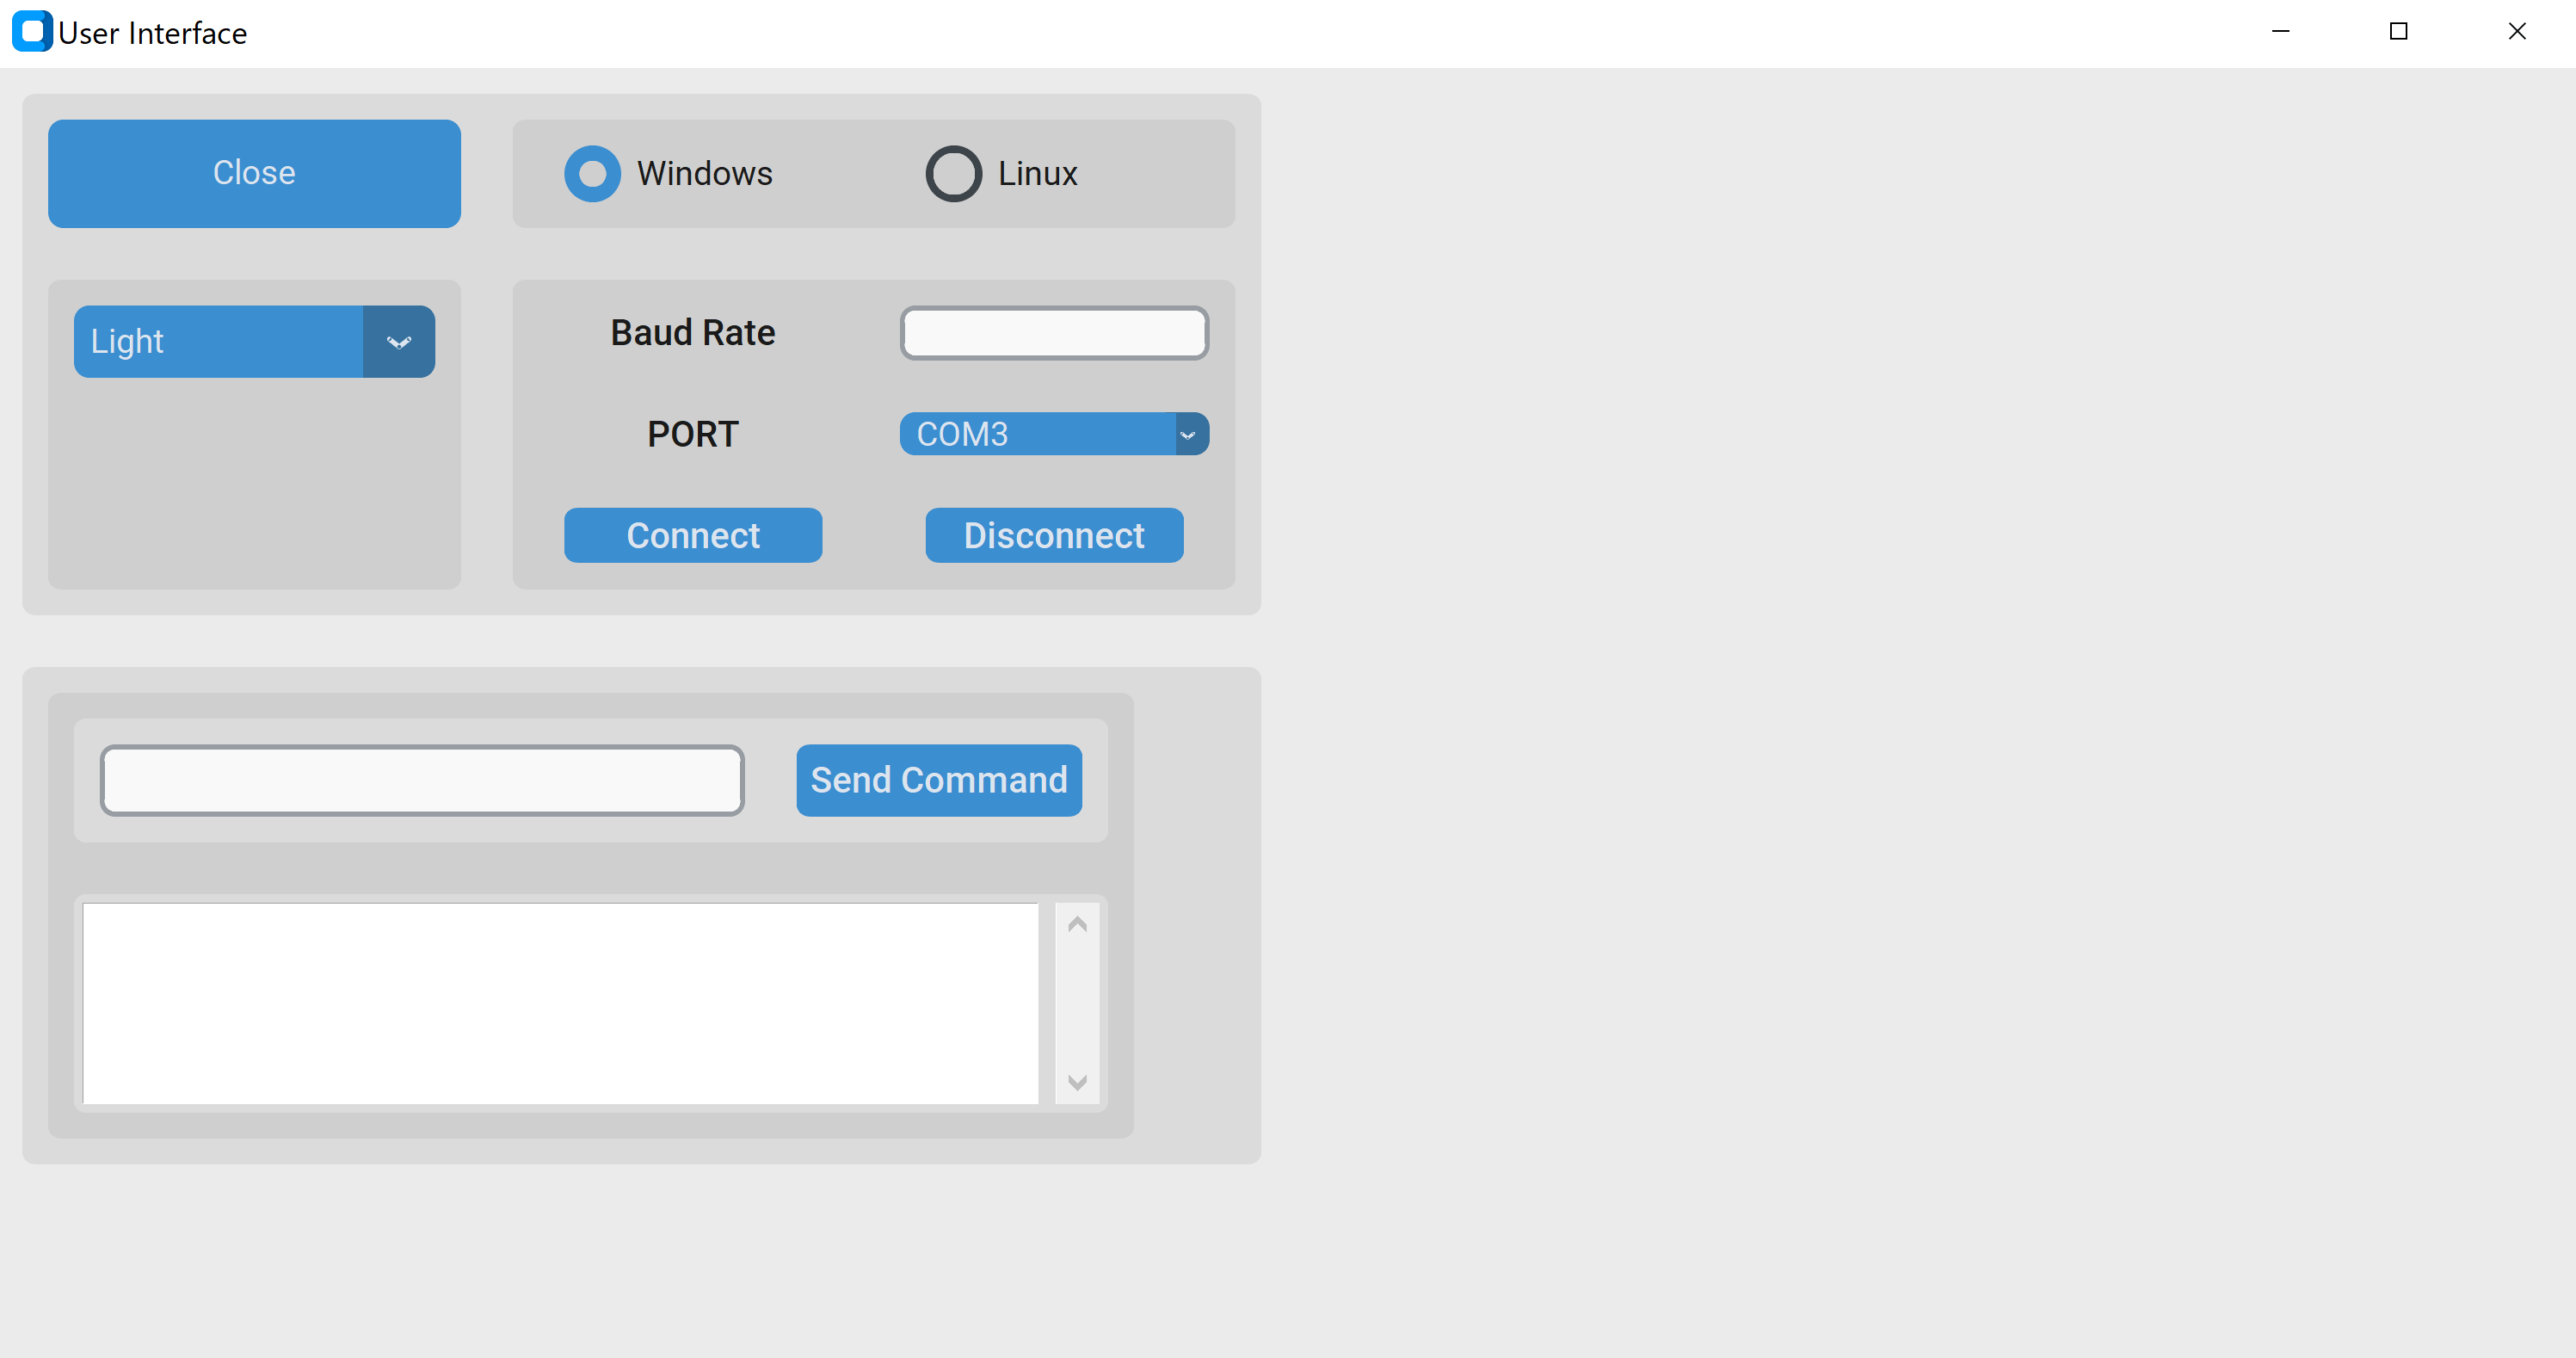

### 3-5.mbed program for Ground Station Software Example

Write the following program in mbed.
This program blinks the LED when command a is received by interrupt.
Start up the software and confirm that the data is displayed in the window. Send the command "a" again.

In [ ]:
# include "mbed.h"
RawSerial sat(USBTX,USBRX);
DigitalOut cond(LED1);
int rcmd = 0, cmdflag = 0;

void commandget(){
  rcmd = sat.getc();
  cmdflag = 1;
}
void receive(int rcmd, int cmdflag){
  sat.attach(commandget,Serial::RxIrq);
}
void initialize(){
  rcmd = 0;
  cmdflag = 0;
}
int main() {
  //House keeping data
  float temp = 10.0; //Temperature [deg.]
  float dtemp = 1.0;
  //Mission data
  receive(rcmd, cmdflag);
  while(1) {
    sat.printf("%f\r\n",temp+dtemp);
    dtemp = dtemp + 0.1;
    if(cmdflag == 1){   
        if(rcmd =='a'){
            cond = 1;
            wait(1.0);
            cond = 0;
            wait(1.0);
        }
        initialize();
    }
    wait(1.0);
  }
}

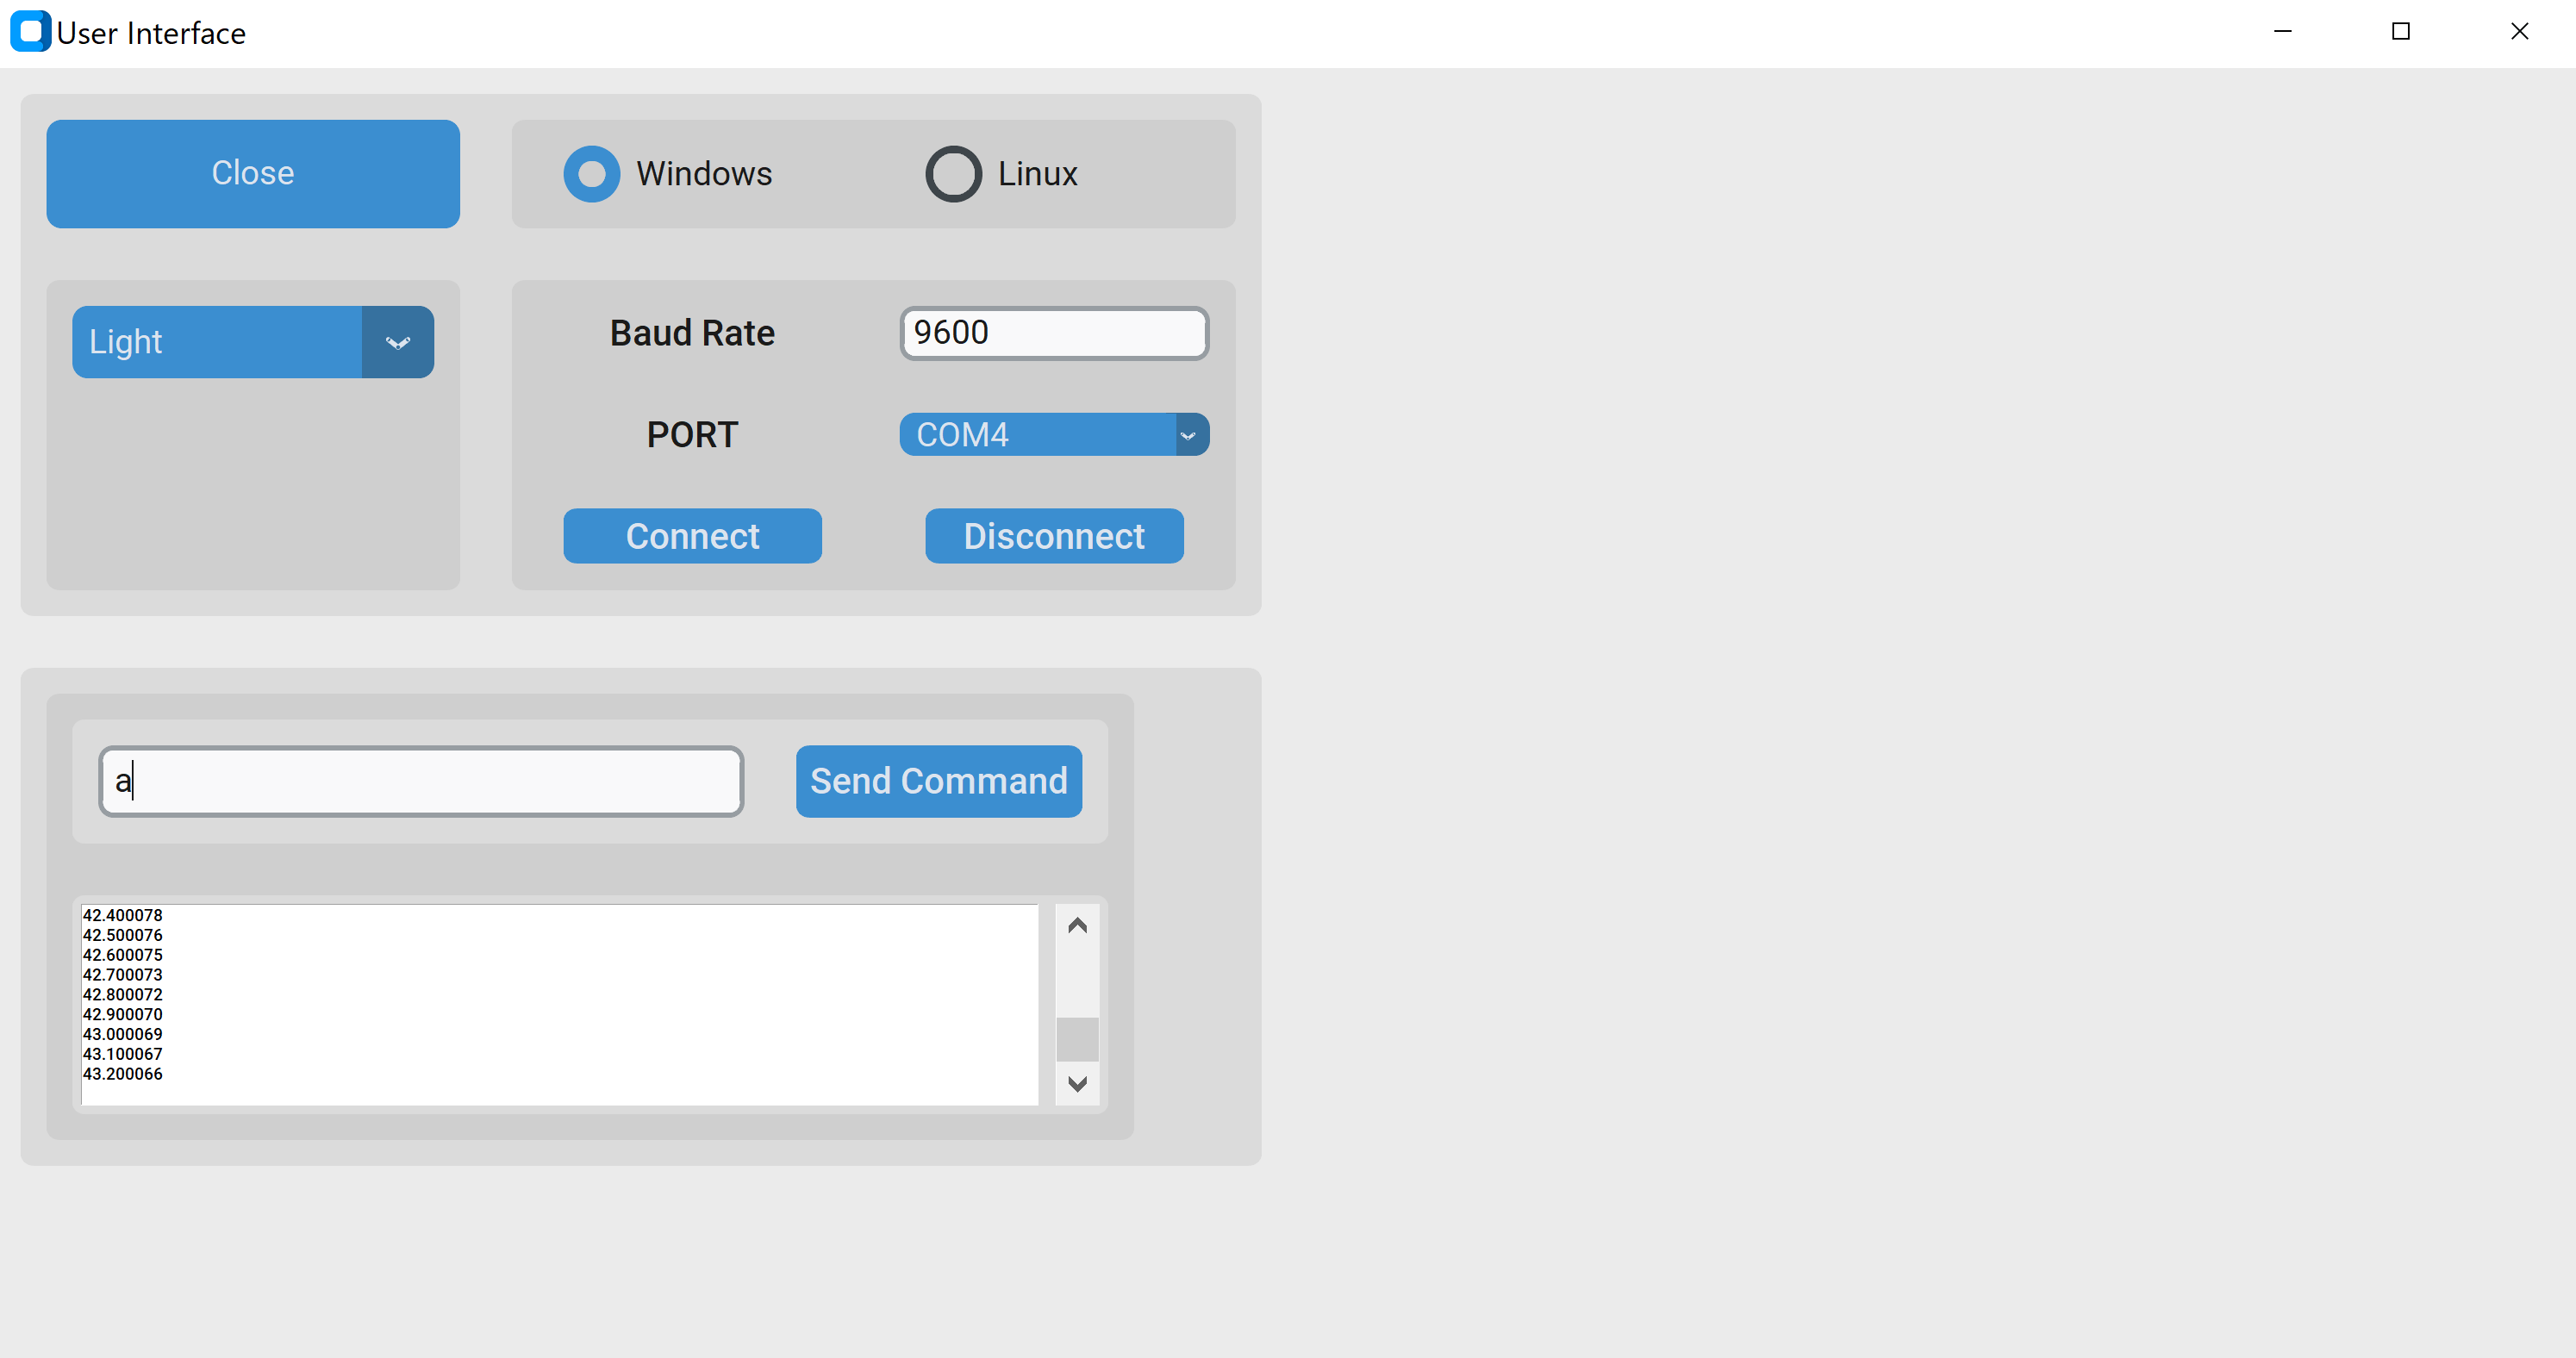

## 4.Visulalize Data

Let's run the following program. The data received via the serial port is displayed as a graph.

In [ ]:
from tkinter import *
import customtkinter
from tkinter import messagebox
from tkinter import filedialog
import sys
import serial
import threading
from matplotlib import pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np

class hepta_sat_gs(customtkinter.CTk):
    WIDTH = 1000                                                                # Screen Size for x
    HEIGHT = 600                                                                # Screen Size for y
    customtkinter.set_appearance_mode("Light")                      # Modes: "System" (standard), "Dark", "Light"
    customtkinter.set_default_color_theme("blue")                  # Themes: "blue" (standard), "green", "dark-blue"  
    global filter_data
    global x,y
    filter_data = 1
    def __init__(self):
        super().__init__()
        self.title("User Interface")                                            # Set the Title
        self.geometry(f"{hepta_sat_gs.WIDTH}x{hepta_sat_gs.HEIGHT}")            # Perform size adjustment
        self.menu_window()                                                      # call .menu window()
        self.main_window()                                                      # call .main window()
        x = np.arange(0, 1, 0.1)
        y = np.random.rand(len(x))        
        self.v_frm = customtkinter.CTkFrame(master=self,width=150,corner_radius=5)
        self.v_frm.grid(row=0,column=1,sticky="nswe",padx=10,pady=10)        # adapt to window & padding(spacing) x,y
        self.v_frm.grid_rowconfigure(0, weight=1)
        self.fig = plt.Figure(figsize=(10, 8))
        self.canvas = FigureCanvasTkAgg(self.fig,self.v_frm)
        self.canvas.draw()
        self.canvas.get_tk_widget().grid(row=0, column=0)
        #self.visual1_window()                                                   # call .visual window()
        #self.visual2_window()                                           # call .visual window()
        self.protocol("WM_DELETE_WINDOW", self.delete_window)                   # call .delete_window() when app gets closed
    
    def delete_window(self,event=0):
        ret = messagebox.askyesno(title = "End Confirmation",message = "Do you want to exit the program ?")
        if ret == True:
            self.destroy()
                
    def change_appearance_mode(self, new_appearance_mode):
        customtkinter.set_appearance_mode(new_appearance_mode)        

    def serial_ports(self):
        """ Lists serial port names
            :raises EnvironmentError:
                On unsupported or unknown platforms
            :returns:
                A list of the serial ports available on the system
        """
        if sys.platform.startswith('win'):
            ports = ['COM%s' % (i + 1) for i in range(256)]
        elif sys.platform.startswith('linux') or sys.platform.startswith('cygwin'):
            # this excludes your current terminal "/dev/tty"
            ports = glob.glob('/dev/tty[A-Za-z]*')
        elif sys.platform.startswith('darwin'):
            ports = glob.glob('/dev/tty.*')
        else:
            raise EnvironmentError('Unsupported platform')
        result = []
        for port in ports:
            try:
                s = serial.Serial(port)
                s.close()
                result.append(port)
            except (OSError, serial.SerialException):
                pass
        return result

    def connect(self):
        version_ = self.button_ver.get()
        global serial_object
        port = self.port_entry.get()
        baud = self.baud_entry.get()
        try:
            if version_ == 2:
                try:
                    serial_object = serial.Serial('/dev/tty'+str(port),baud)
                except:
                    print("Can't Open Specified Port")
            elif version_ == 1:
                serial_object = serial.Serial(str(port),baud,timeout=0.1)
            elif version_ == 0:
                print("Enter Baud and Port")
                return
        except ValueError:
            print("Enter Baud and Port")
            return
        t1 = threading.Thread(target = self.get_data)
        t1.start()
        
    def disconnect(self):
        global flag
        flag = False
        try:
            serial_object.close()
            print("finish Using it ....")
        except AttributeError:
            print("without Using it ....")
            pass

    def send(self):
        send_data = self.cmd_entry.get()
        if not send_data:
            print("Sent Nothing")
        serial_object.write(str.encode(send_data))   
      
    def get_data(self):
        global flag
        flag = True
        global filter_data
        global x,y
        x = np.arange(0, 1, 0.1)
        y = np.random.rand(len(x)) 
        while(flag):
            try:
                srl_data = serial_object.readline()
                if srl_data != b'':
                    filter_data = (str(srl_data.decode())).encode('utf-8')
                    self.visual1_window()
                    self.txtbox.insert(END,filter_data)
                    self.txtbox.see("end")
            except TypeError:
                pass
            
    def menu_window(self):                                                      # setting menu Frame & widget
        self.menu_frm = customtkinter.CTkFrame(master=self,width=150,corner_radius=5)
        self.menu_frm.grid(row=0, column=0, sticky="nswe",padx=10,pady=10)      # adapt to window

    #file_btn
        self.close_menu = customtkinter.CTkButton(master=self.menu_frm,text="Close",command=self.delete_window)
        self.close_menu.grid(row=0, column=0, pady=10, padx=10,sticky="nswe")     
    
    # label_mode
        self.set_lble = customtkinter.CTkFrame(master=self.menu_frm,width=150,corner_radius=5)
        self.set_lble.grid(row=1,column=0,pady=10, padx=10,sticky="nswe")
        self.home_menu = customtkinter.CTkOptionMenu(master=self.set_lble,
                                                     values=["Light", "Dark"],command=self.change_appearance_mode)
        self.home_menu.grid(row=0, column=0, pady=10, padx=10,sticky="nswe")
        self.home_menu2 = customtkinter.CTkButton(master=self.set_lble,
                                                     text="update",command=self.visual2_window)
        self.home_menu2.grid(row=1, column=0, pady=10, padx=10,sticky="nswe")
    
    # set_frm
        self.set_lbl = customtkinter.CTkFrame(master=self.menu_frm,width=150,height=10,corner_radius=5)
        self.set_lbl.grid(row=0,column=1,pady=10, padx=10,sticky="nswe")
        self.set_frm = customtkinter.CTkFrame(master=self.menu_frm,width=150,height=10,corner_radius=5)
        self.set_frm.grid(row=1,column=1,pady=10, padx=10,sticky="nswe")
        
    # os select
        self.button_ver = IntVar()
        self.radio_win = customtkinter.CTkRadioButton(master=self.set_lbl,
                                                      variable = self.button_ver,value=1,text="Windows")
        self.radio_win.grid(row=0, column=0, pady=10, padx=20, sticky="nswe")
        self.radio_Lnx = customtkinter.CTkRadioButton(master=self.set_lbl,
                                                      variable = self.button_ver,value=2,text="Linux")
        self.radio_Lnx.grid(row=0, column=1, pady=10, padx=20, sticky="nswe")
        self.button_ver.set(1)

    # set_btn
        self.baud_label = customtkinter.CTkLabel(master=self.set_frm,width=80,height=10,
                                                  text="Baud Rate",font=("Roboto Medium",14))
        self.baud_label.grid(row=0,column=0,pady=10,padx=10,sticky="nswe")
        self.port_label = customtkinter.CTkLabel(master=self.set_frm,width=80,height=10,
                                                  text="PORT",font=("Roboto Medium",14))
        self.port_label.grid(row=1,column=0,pady=10,padx=10,sticky="nswe")
        
        self.baud_entry = customtkinter.CTkEntry(master=self.set_frm,width=100,height=10)
        self.baud_entry.grid(row=0,column=1,pady=10,padx=10,sticky="nswe")    
        
    # serial port
        port_num = []
        port_num = self.serial_ports()
        # print(port_num)
        self.port_entry = customtkinter.CTkOptionMenu(master=self.set_frm,width=100,height=10,values=port_num)
        self.port_entry.grid(row=1,column=1,pady=10,padx=10,sticky="nswe")     

    # connect    
        self.connect_btn = customtkinter.CTkButton(master=self.set_frm,width=100,height=10,
                                                    text="Connect",font=("Roboto Medium",14),command=self.connect)
        self.connect_btn.grid(row=2,column=0,pady=10,padx=20,sticky="nswe")
        
    # disconnect
        self.disconnect_btn = customtkinter.CTkButton(master=self.set_frm,width=100,height=10,
                                                      text="Disconnect",font=("Roboto Medium",14),command=self.disconnect)
        self.disconnect_btn.grid(row=2,column=1,pady=10,padx=20,sticky="nswe")    

    def main_window(self):                                                      # setting menu Frame & widget
        self.main_frm = customtkinter.CTkFrame(master=self,width=150,corner_radius=5)
        self.main_frm.grid(row=1,column=0,sticky="nswe",padx=10,pady=10)        # adapt to window & padding(spacing) x,y
    # set_frm
        self.rdata_frm = customtkinter.CTkFrame(master=self.main_frm,width=150,height=100,corner_radius=5)
        self.rdata_frm.grid(row=0,column=0,pady=10, padx=10,sticky="nswe")    
    # In rdata_frm{main_frm[2,0]}    ----------------------------------
        self.rdata_frm.grid_rowconfigure(0, weight=1)
        self.rdata_frm.grid_rowconfigure(1, weight=1)
        self.rdata_lbl = customtkinter.CTkFrame(master=self.rdata_frm,
                                                width=30,height=40,corner_radius=5)
        self.rdata_lbl.grid(row=0,column=0,pady=10, padx=10,sticky="nswe")
        self.rdata_box = customtkinter.CTkFrame(master=self.rdata_frm,
                                                width=30,height=100,corner_radius=5)
        self.rdata_box.grid(row=1,column=0,pady=10, padx=10,sticky="nswe")
     # data_box
        self.cmd_entry = customtkinter.CTkEntry(master=self.rdata_lbl,width=250)
        self.cmd_entry.grid(row=0,column=0,pady=10,padx=10,sticky="nswe")  
    # send    
        self.send_btn = customtkinter.CTkButton(master=self.rdata_lbl,width=20,height=10,
                                                text="Send Command",font=("Roboto Medium",14),command=self.send)
        self.send_btn.grid(row=0,column=1,pady=10,padx=10,sticky="nswe")    
    # messagebox
        self.txtbox = Text(self.rdata_box,width=100,height=25)
        self.scroll = Scrollbar(self.rdata_box, orient=VERTICAL, command=self.txtbox.yview)
        self.scroll.pack(side=RIGHT, fill="y",padx=10,pady=10)
        self.txtbox["yscrollcommand"] = self.scroll.set
        self.txtbox.pack(fill = 'x', padx=10,pady=10)
        self.txtbox.configure(font=("Roboto Medium",17))    

    def visual1_window(self):                                                      # setting menu Frame & widget
        def plot_wave(x, y):
            # Turn the scale inward.
            plt.rcParams['xtick.direction'] = 'in'
            plt.rcParams['ytick.direction'] = 'in'

            # Create Axes and put scale lines on the top, bottom, left and right of the graph.
            ax1 = self.fig.add_subplot(111)
            ax1.tick_params(axis='x', labelsize=24)
            ax1.tick_params(axis='y', labelsize=24)
            ax1.patch.set_facecolor('gray')  # subplotの背景色
            ax1.patch.set_alpha(0.1)  # subplotの背景透明度
            ax1.yaxis.set_ticks_position('both')
            ax1.xaxis.set_ticks_position('both')

            # Set axis labels.
            ax1.set_xlabel('x',fontsize=24)
            ax1.set_ylabel('y',fontsize=24)

            # Plot the data.
            ax1.plot(x, y, color='b', linewidth=4)
            ax1.grid(color = "gray", linestyle="--")
            return self.fig
        
        global y
        y = np.roll(y, -1) # move all data to left by 1
        y[-1] = filter_data.decode() # replace last data with new values
        self.fig.clf()
        self.fig = plot_wave(x, y)
        self.canvas.draw()       

    def visual2_window(self):                                                      # setting menu Frame & widget
        def plot_wave(x, y):
            # Turn the scale inward.
            plt.rcParams['xtick.direction'] = 'in'
            plt.rcParams['ytick.direction'] = 'in'

            # Create Axes and put scale lines on the top, bottom, left and right of the graph.
            ax1 = self.fig.add_subplot(111)
            ax1.tick_params(axis='x', labelsize=24)
            ax1.tick_params(axis='y', labelsize=24)
            ax1.patch.set_facecolor('gray')  # subplotの背景色
            ax1.patch.set_alpha(0.1)  # subplotの背景透明度
            ax1.yaxis.set_ticks_position('both')
            ax1.xaxis.set_ticks_position('both')

            # Set axis labels.
            ax1.set_xlabel('x',fontsize=24)
            ax1.set_ylabel('y',fontsize=24)

            # Plotting Data
            ax1.plot(x, y, color='b', linewidth=4)
            ax1.grid(color = "gray", linestyle="--")
            return self.fig
        global y
        self.fig.clf()
        self.fig = plot_wave(x, y)
        self.canvas.draw()

# =============================================================================
# Main Sequence
# =============================================================================    
if __name__ == "__main__":
    app = hepta_sat_gs()
    app.mainloop()

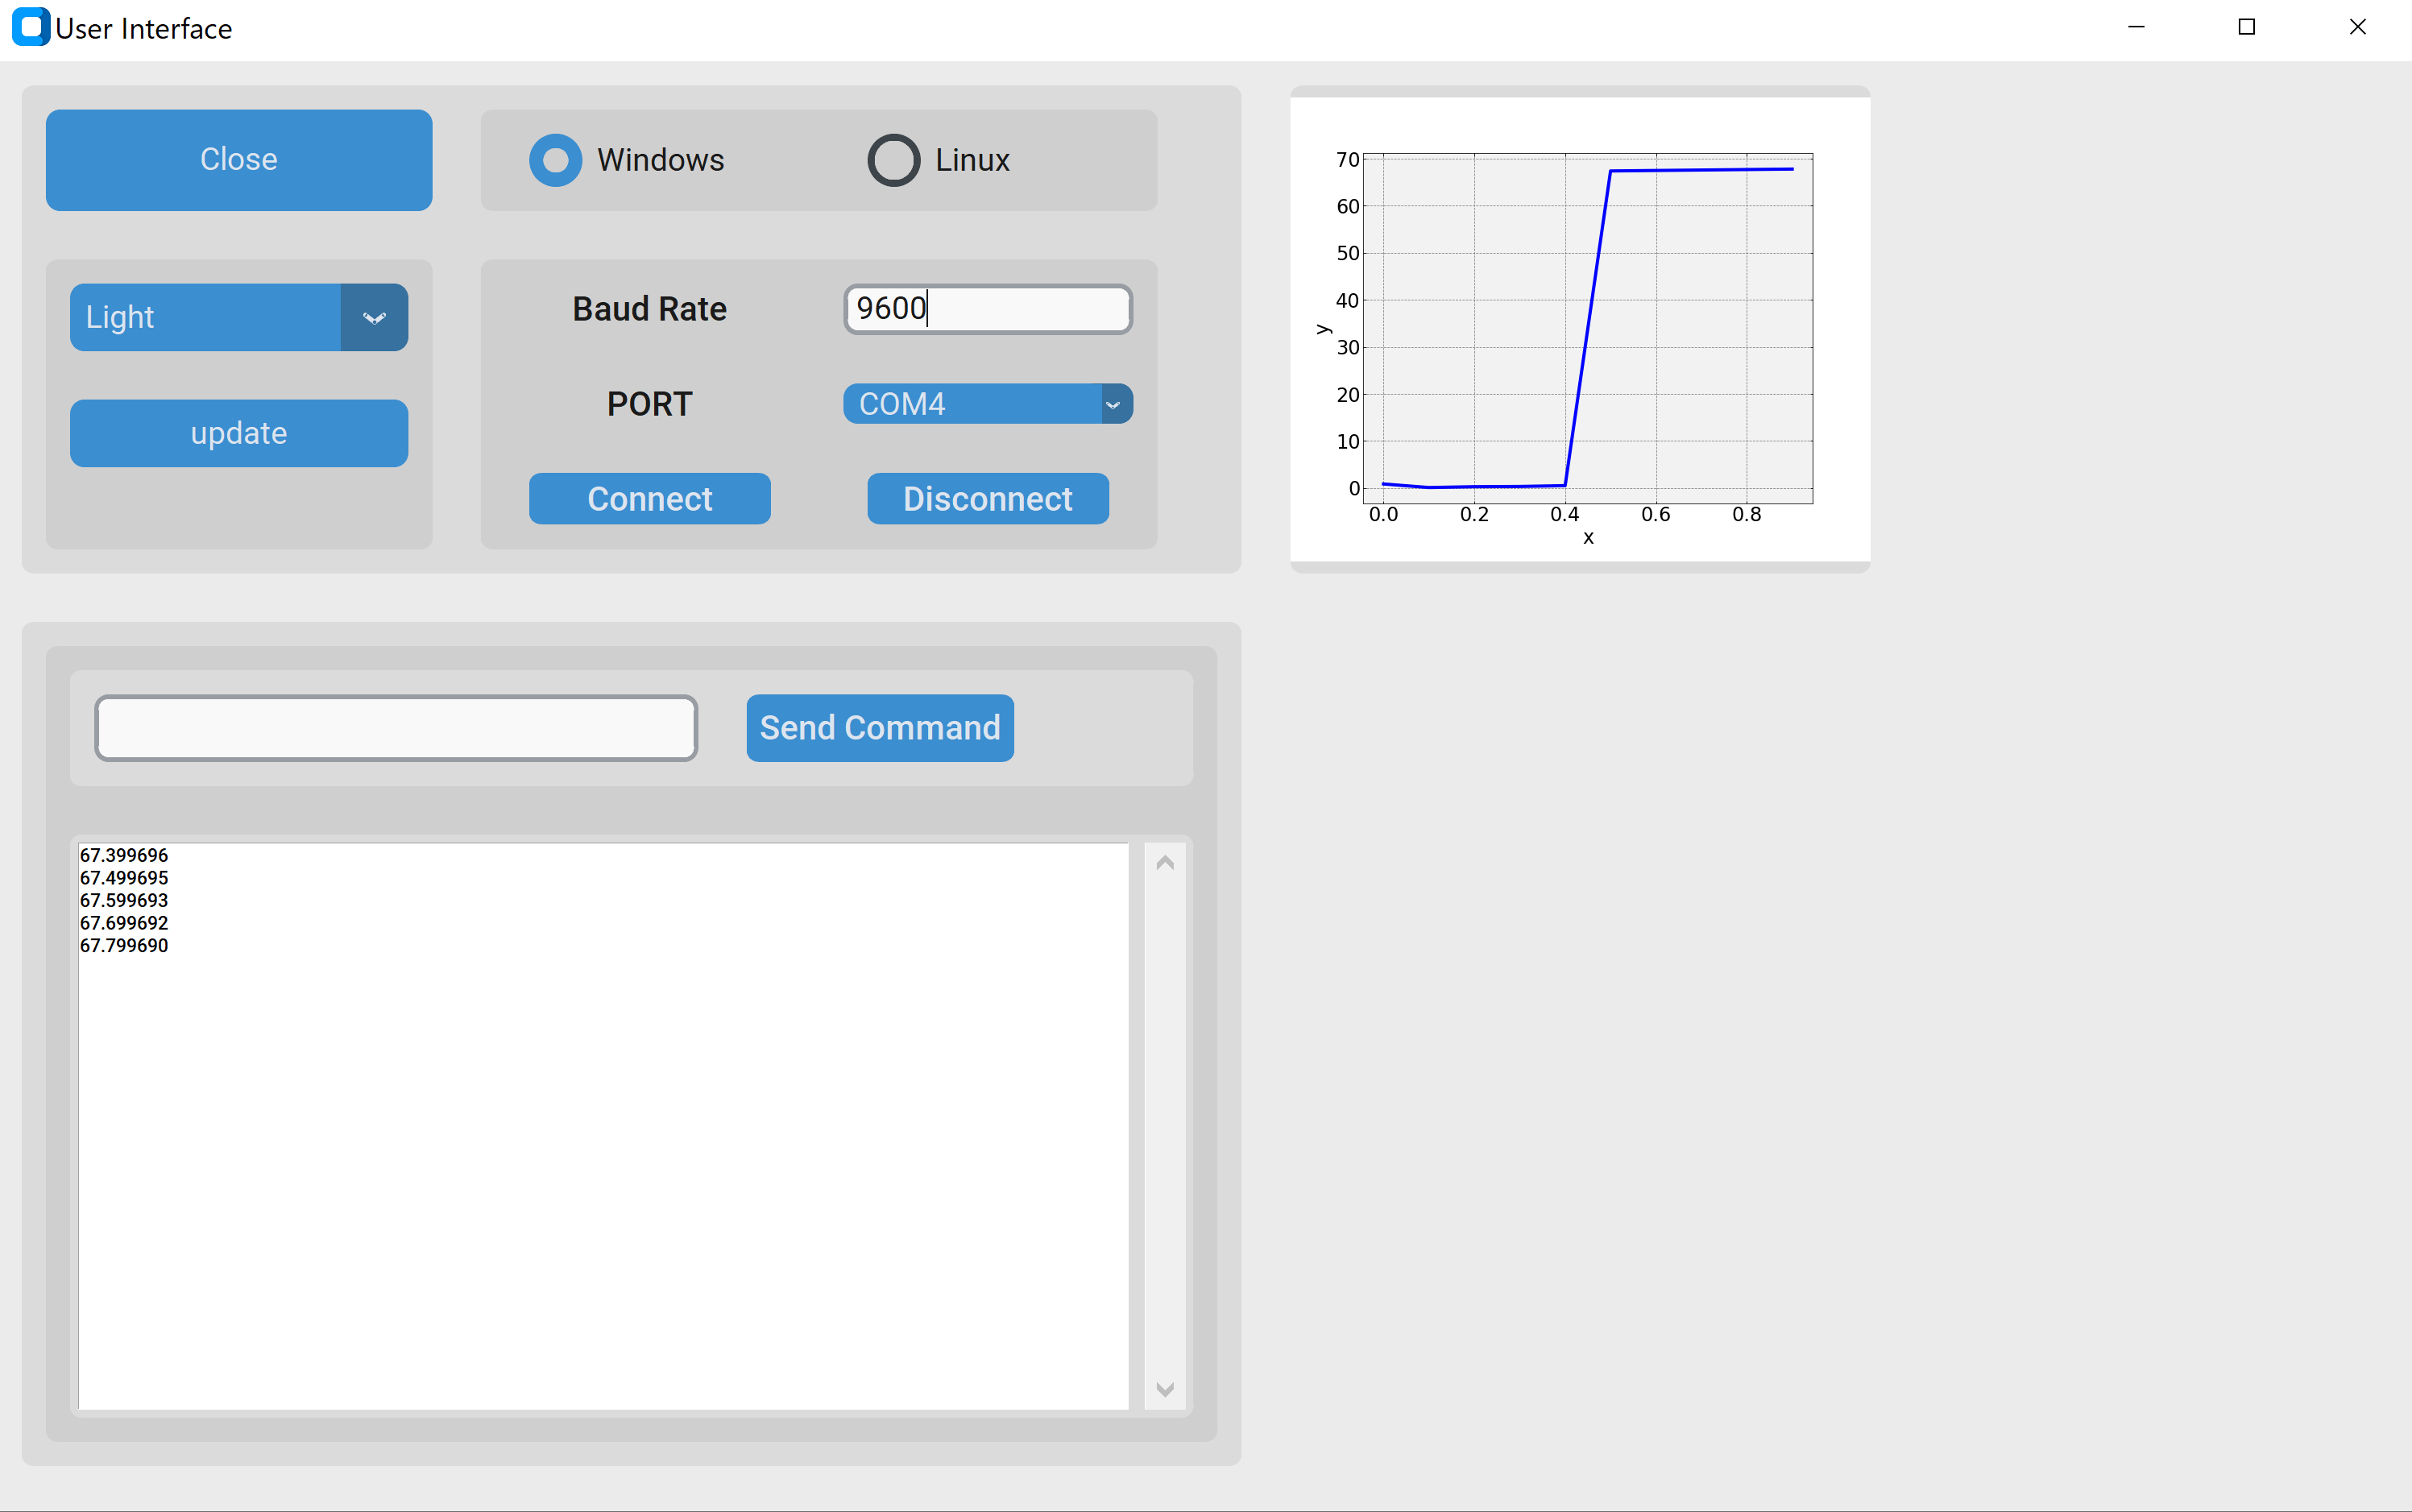

## 5.Summary
This concludes the exercise. Congratulations! From here, you are free to create your own Ground Station Software.